# <b>Outlier Detection Methods</b>
<h2><b>AGENDA</b></h2>
<ol type=1>
  <li>Importing the Necessary Libraries</li>
  <li>Import the Dataset</li>
  <li>Introduce the Feature List</li>
  <li>Statistical Detection Method</li>
  <li>Distance-based Detection method</li>
  <li>Density-based Detection method</li>
  <li>Cluster-based Detection method</li>
</ol>

### **Import the Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
from sklearn.neighbors import KernelDensity

### <b>Import the dataset</b>

In [ ]:
df_raw = pd.read_csv('creditcard.csv')
df=df_raw.drop(['Time'], axis=1)
print(df)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.239599  0.098698  0.363787  0.090794  ... -0.01830

### <b>Introduce the Features List</b>

In [ ]:
feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

## **Statistical Detection Method**

Parametric Methods - (**Gaussian and Regression Based**)

Non Parametric Methods - (**Histogram and Kernel Based**)



### **Parametric - Gaussian Based Method**

> BoxPlot - ( IQR-[inter quartile] Method)

In [ ]:
def IQR_method(df, n, features):

    outlier_list = []
    total_outliers = 0

    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outlier_list.extend(outlier_list_column)
        below_bound = df[df[column] < Q1 - outlier_step].shape[0]
        above_bound = df[df[column] > Q3 + outlier_step].shape[0]
        total_outliers += below_bound + above_bound
    outlier_count = Counter(outlier_list)
    multiple_outliers = [k for k, v in outlier_count.items() if v > n]
    print(f'Total number of outliers across all columns: {total_outliers}')

    return multiple_outliers


In [ ]:
Outliers_IQR = IQR_method(df, 1, feature_list)

Total number of outliers across all columns: 370372


### **Parametric - Regression Based Method**

> Linear Regression - ( Calculating MSE & R<sup>2</sup> Method)

In [ ]:
X = df[feature_list].values
y = df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0007348968805853504
R-squared: 0.5375595626346819


### **Non Parametric - Histogram Based Method**

> Static Bin width

> Dynamic Bin width


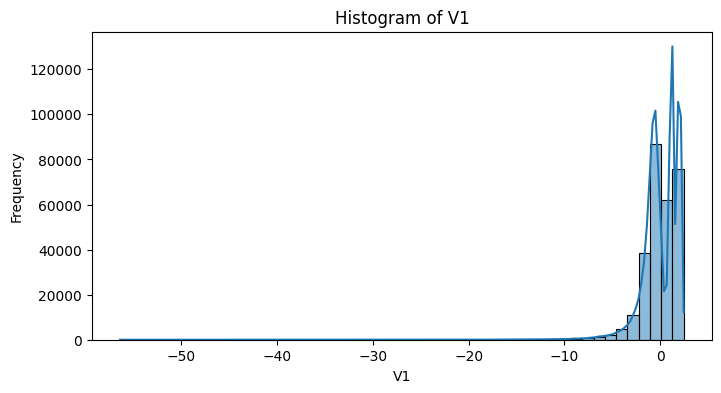

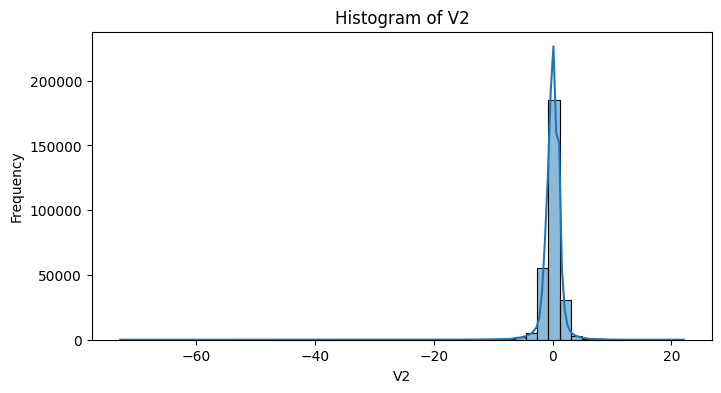

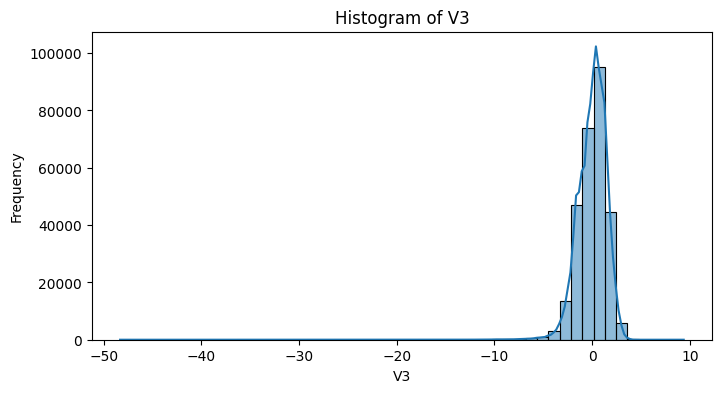

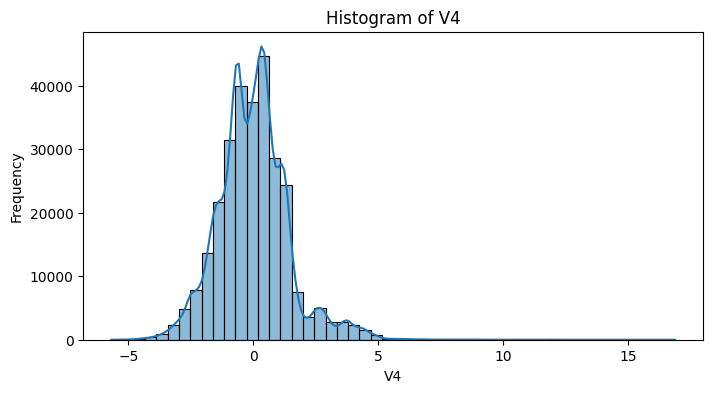

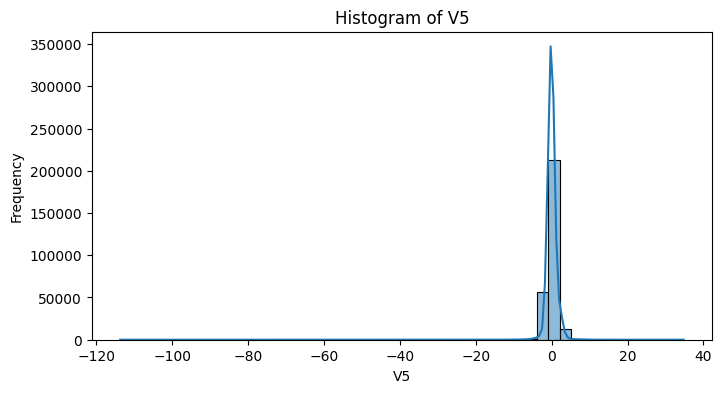

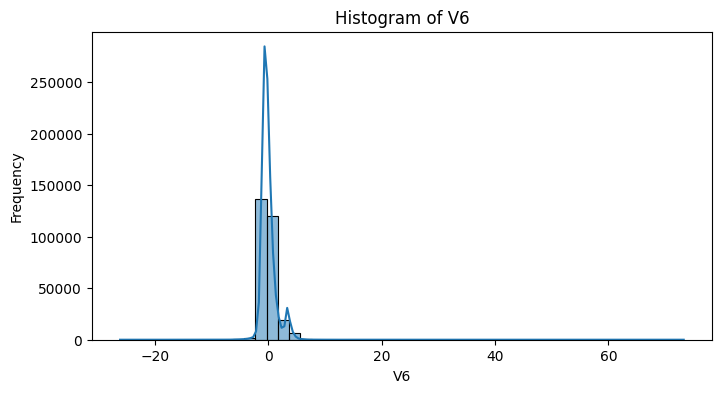

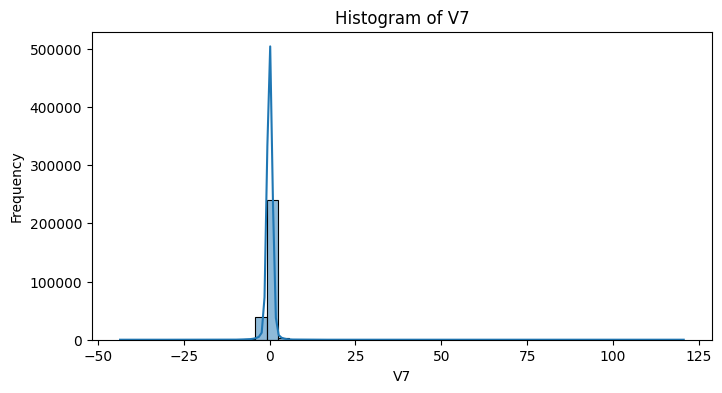

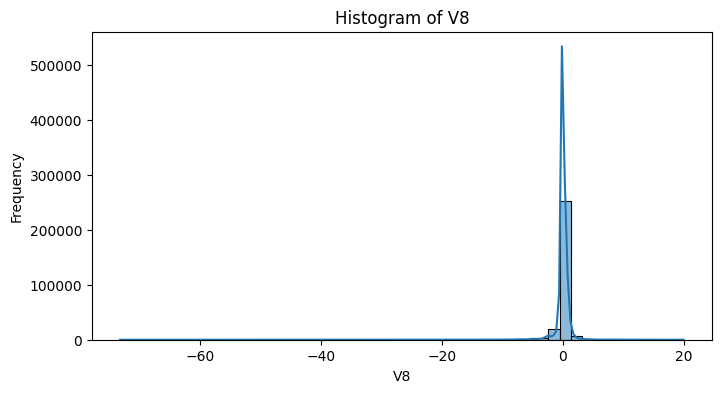

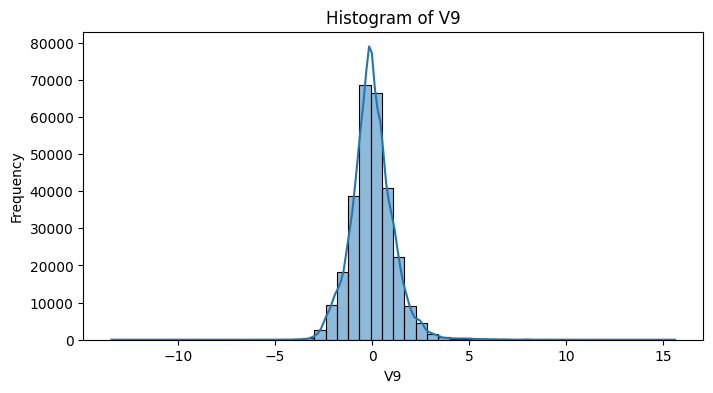

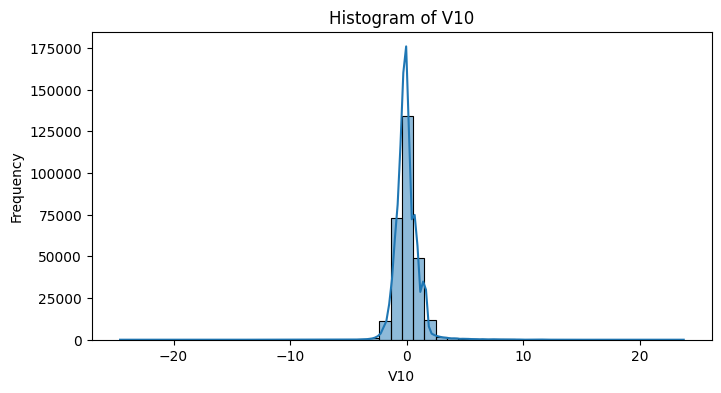

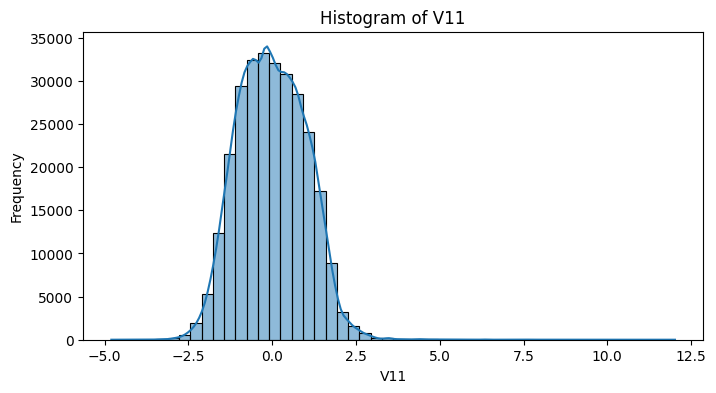

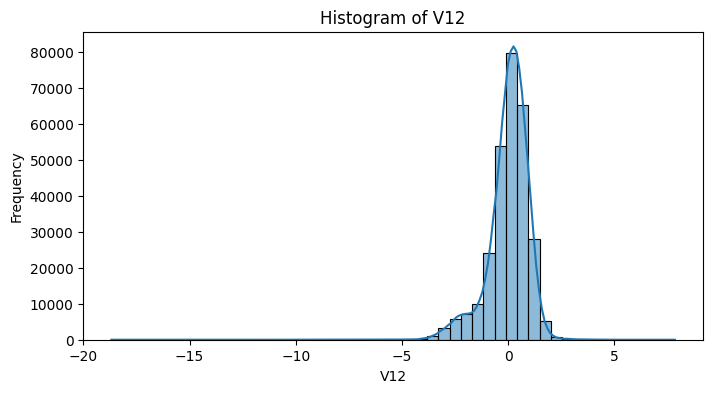

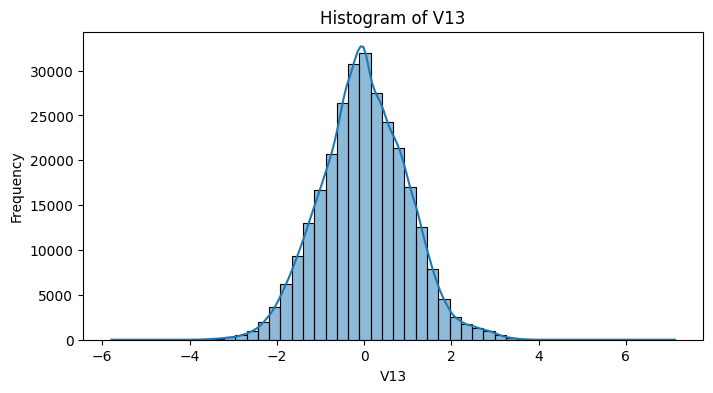

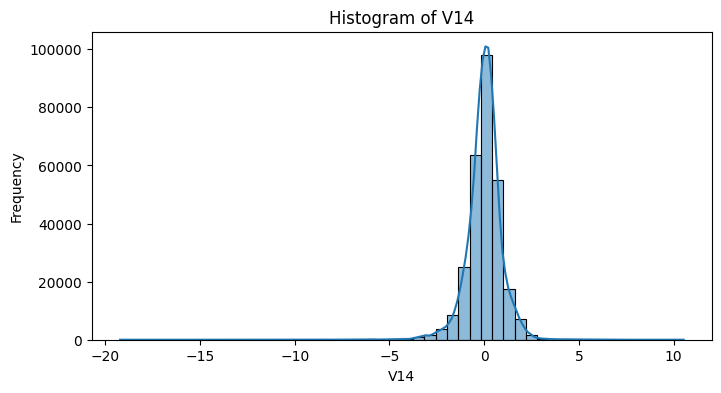

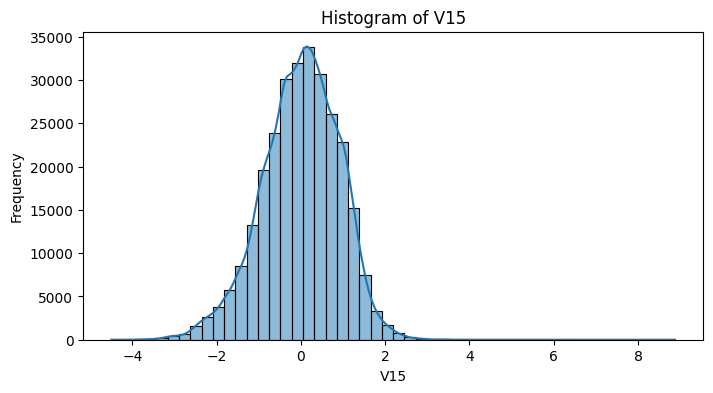

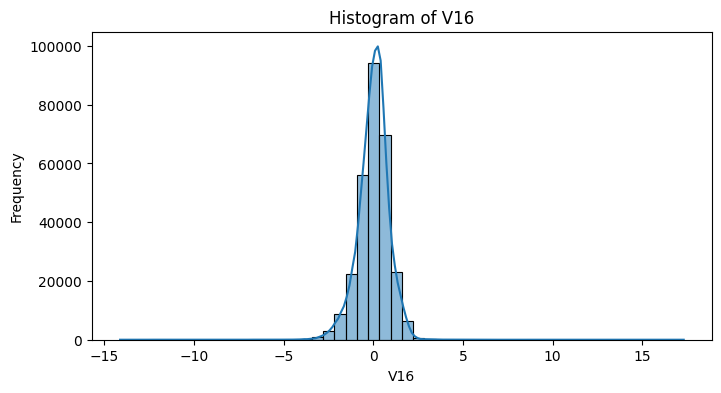

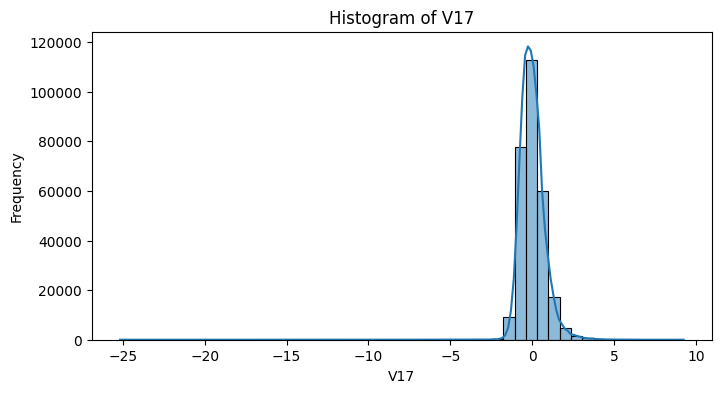

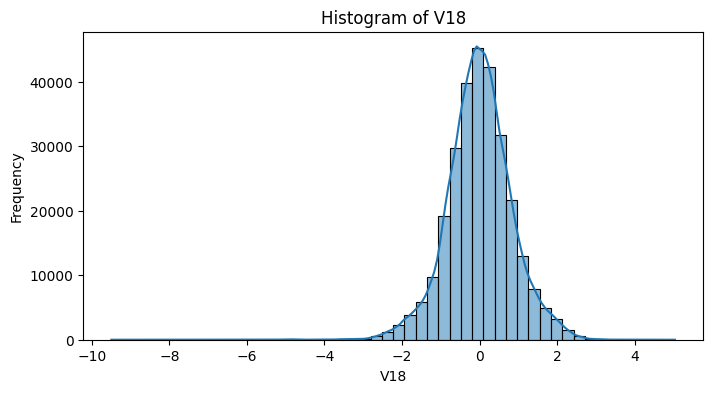

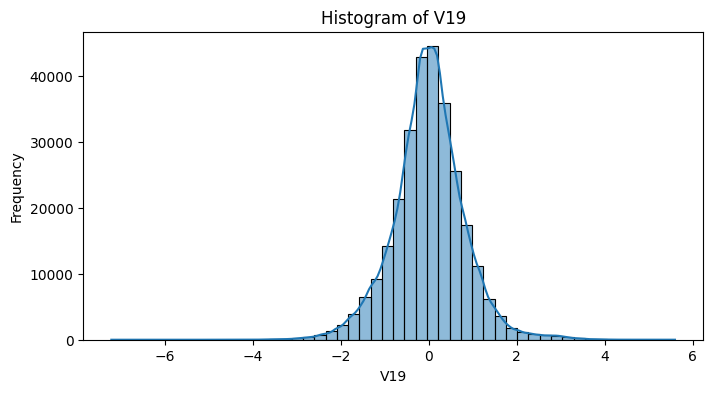

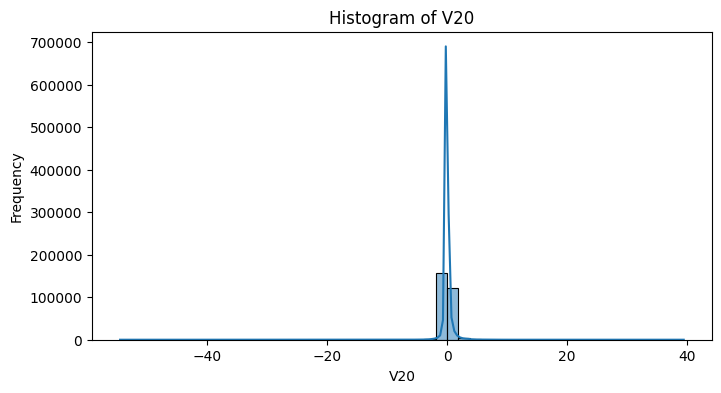

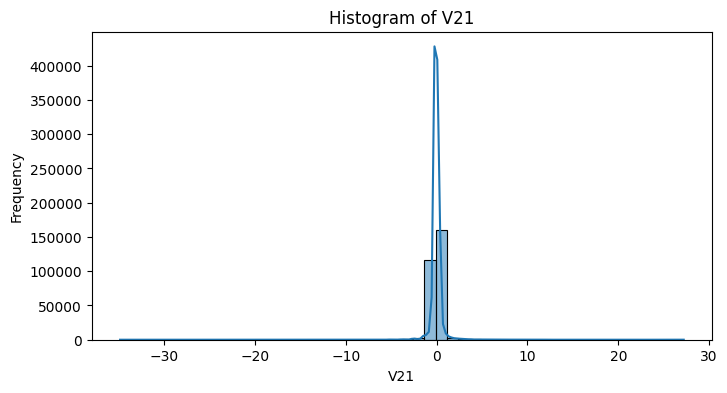

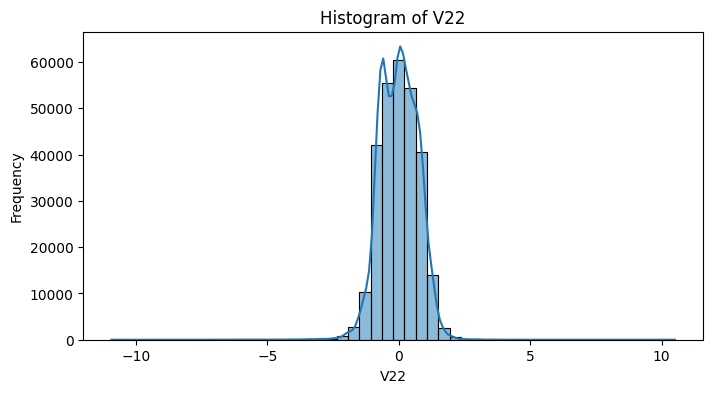

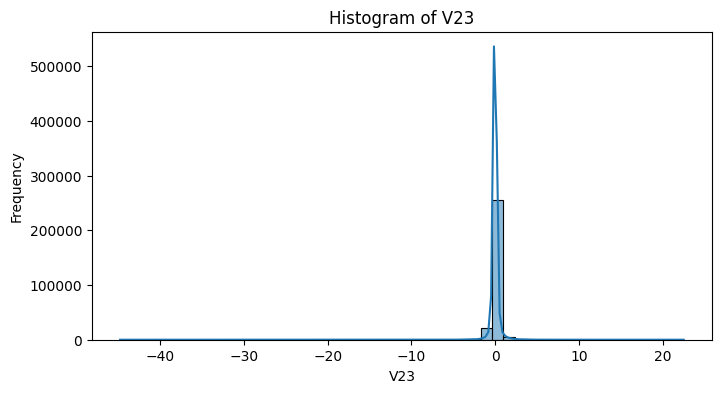

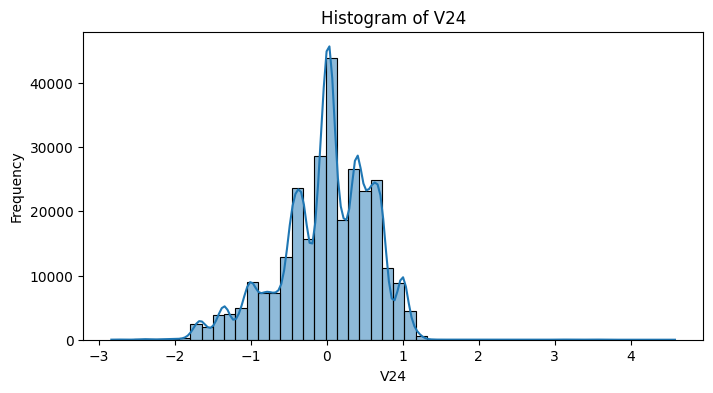

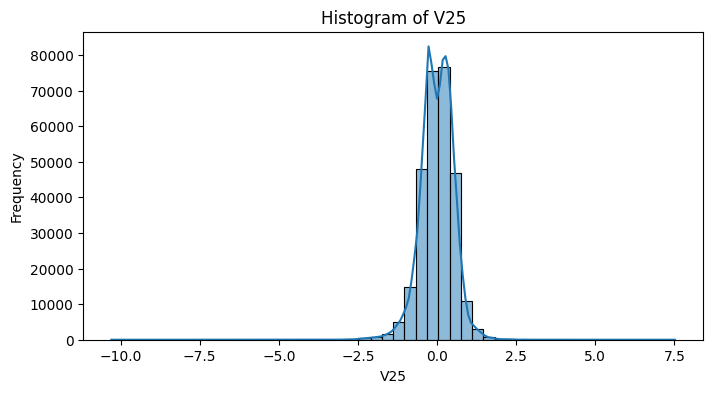

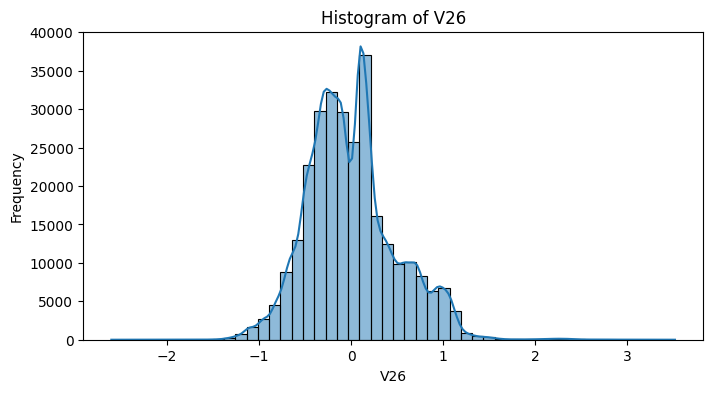

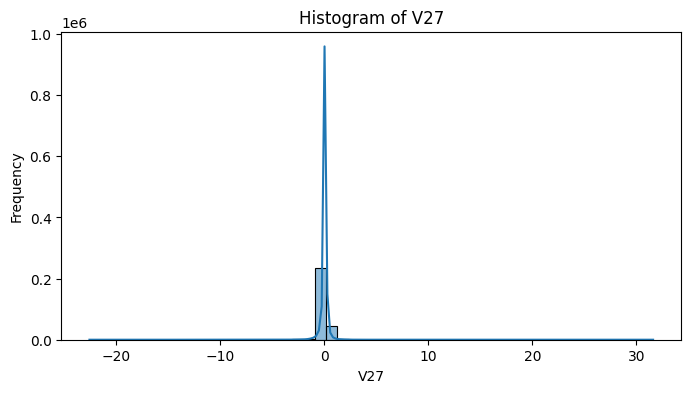

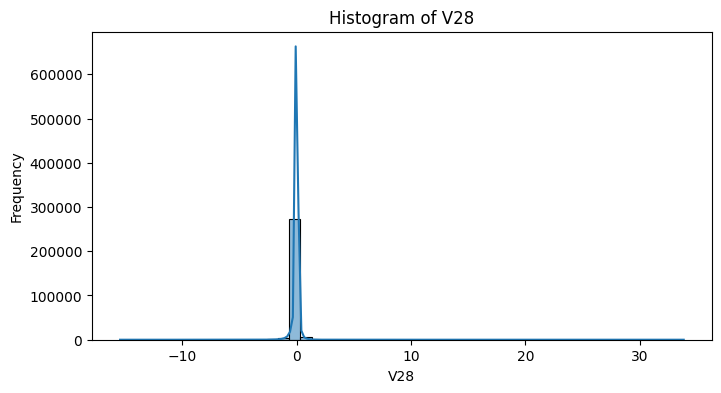

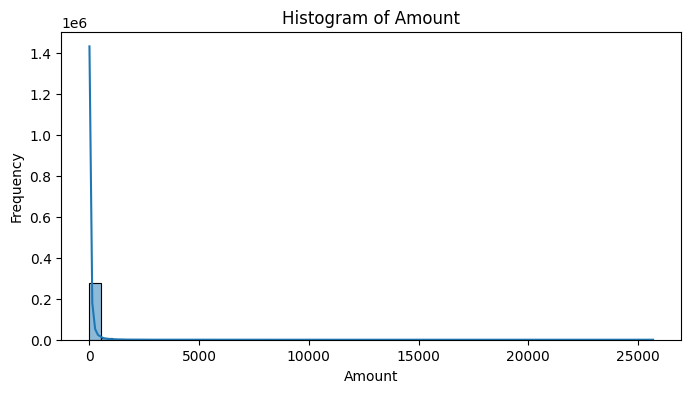

In [ ]:
def plot_histograms(df, features):
    for feature in features:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature], bins=50, kde=True)
        plt.title(f"Histogram of {feature}")
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

# Use the function on the dataset
plot_histograms(df, feature_list)

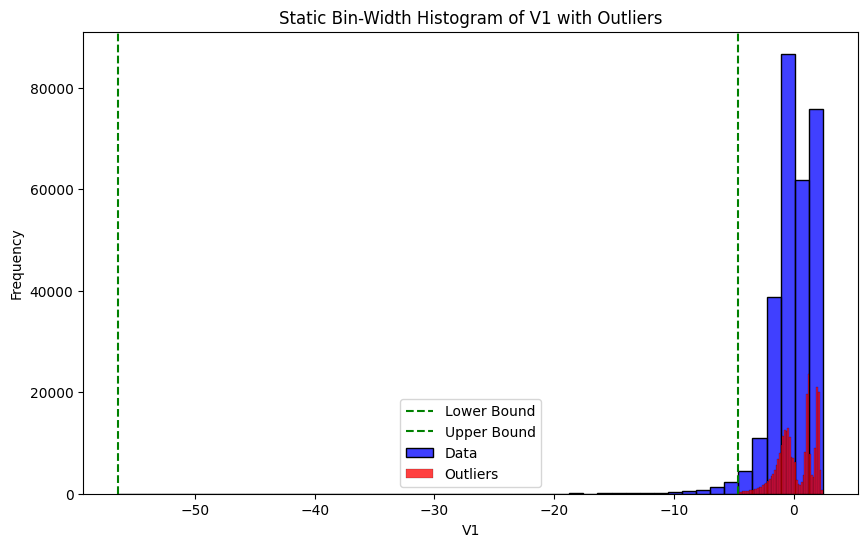

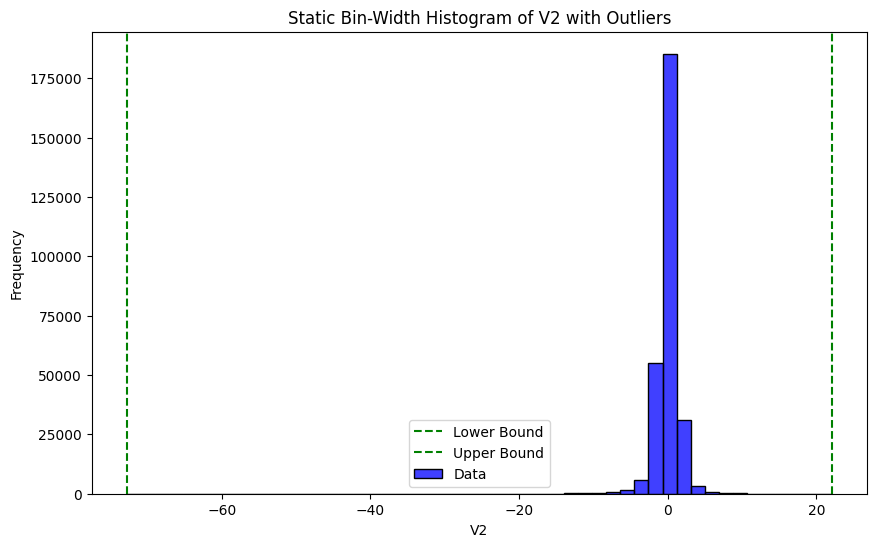

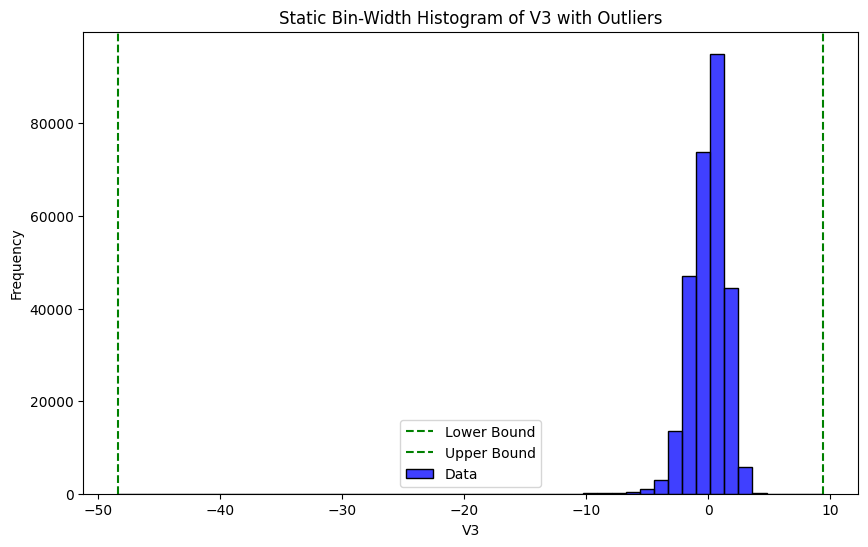

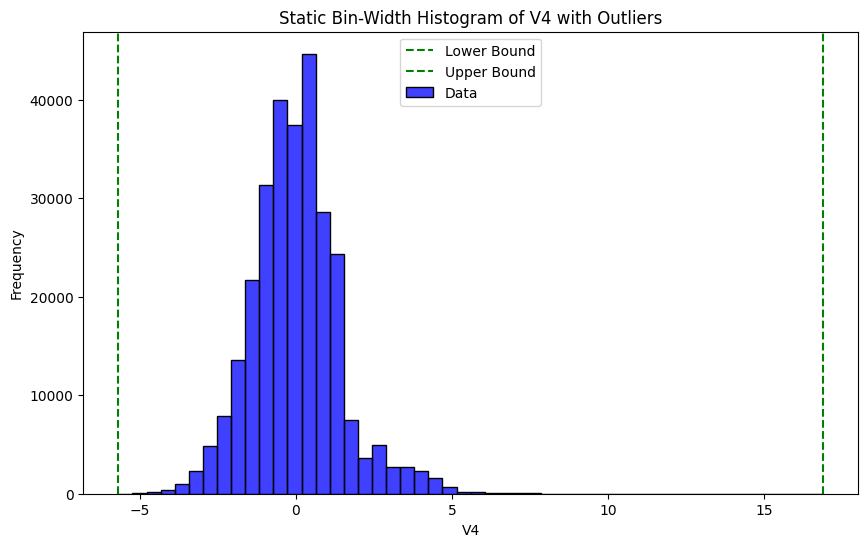

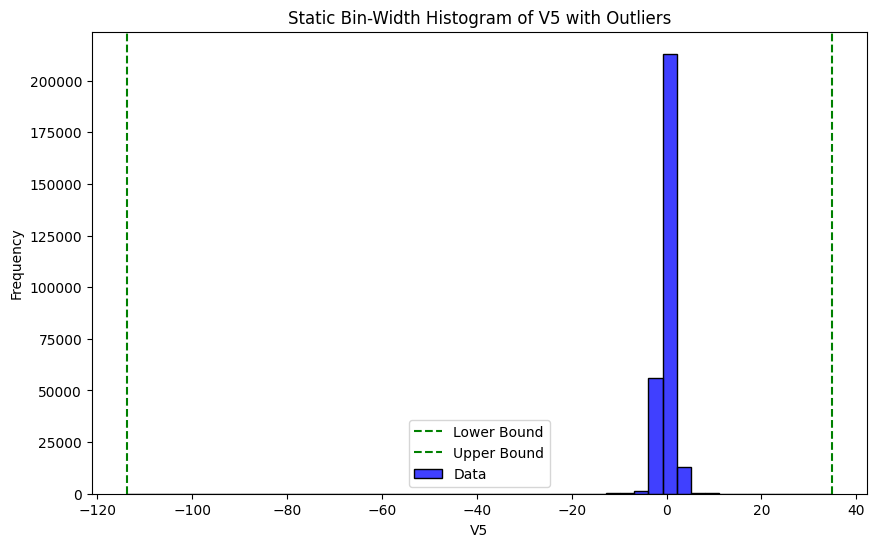

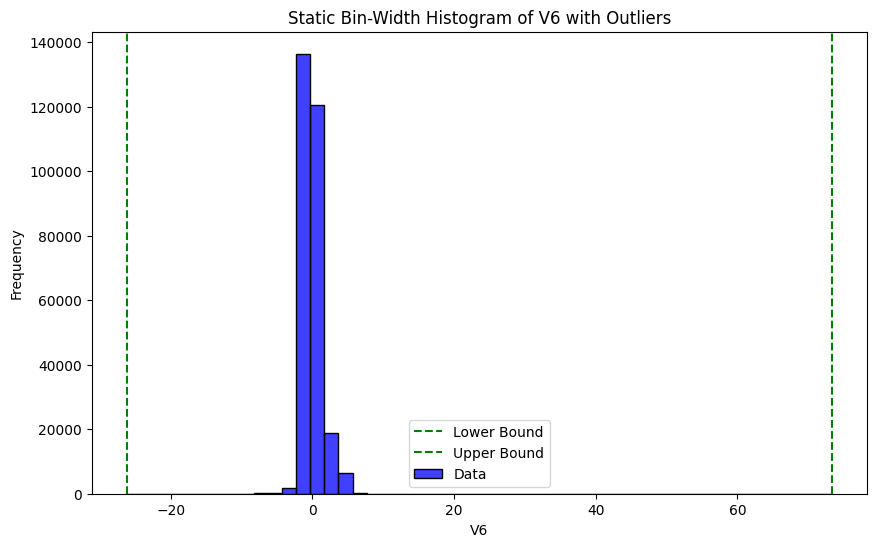

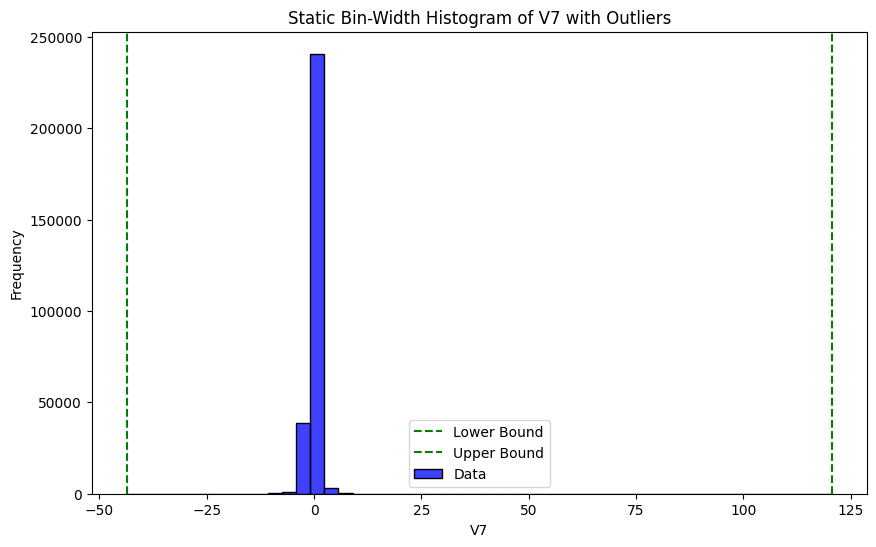

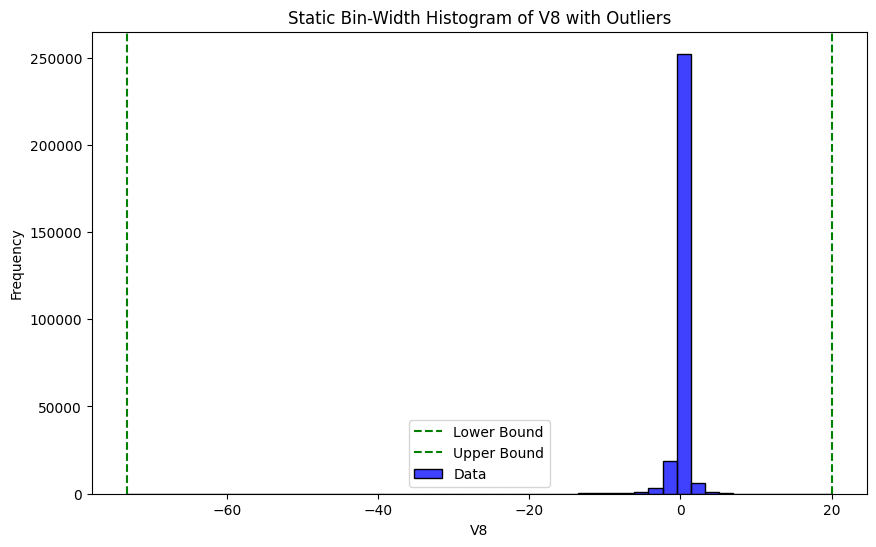

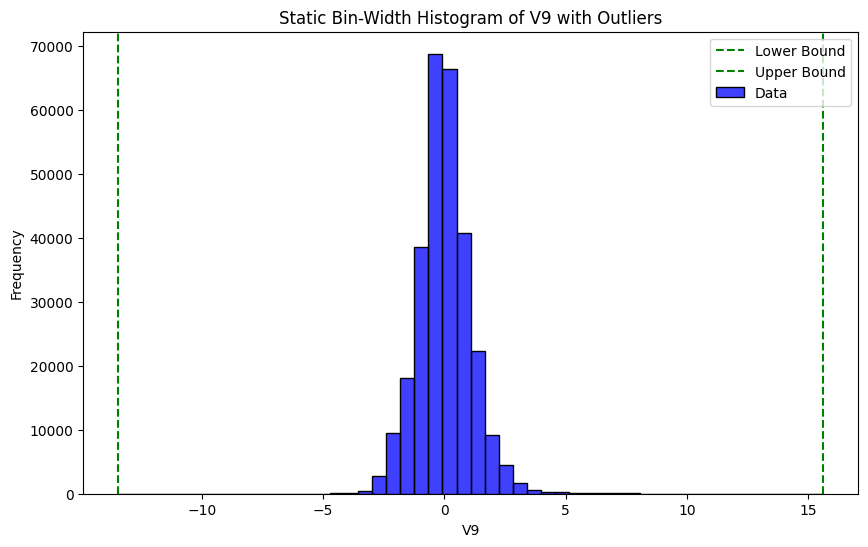

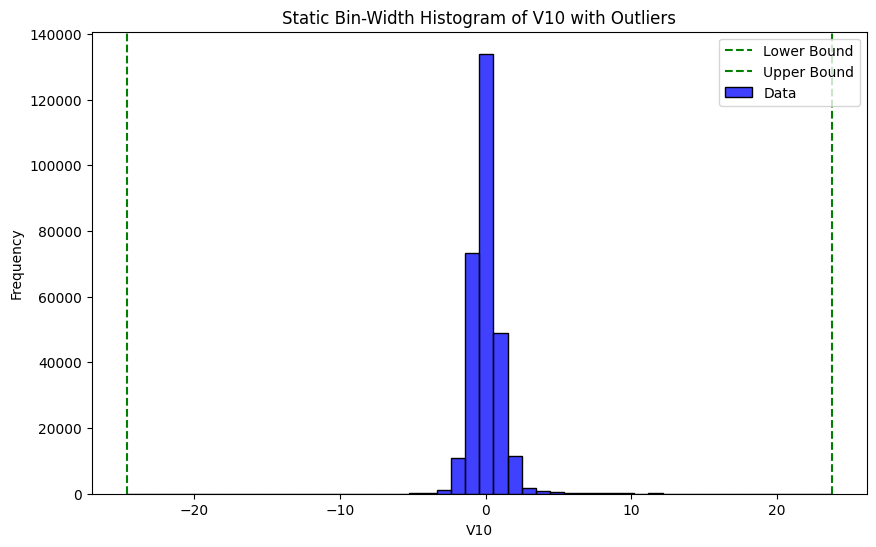

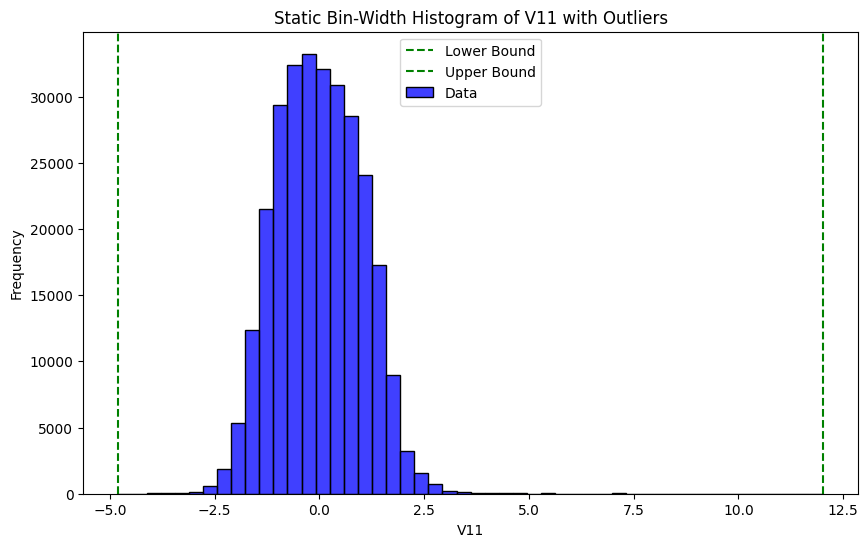

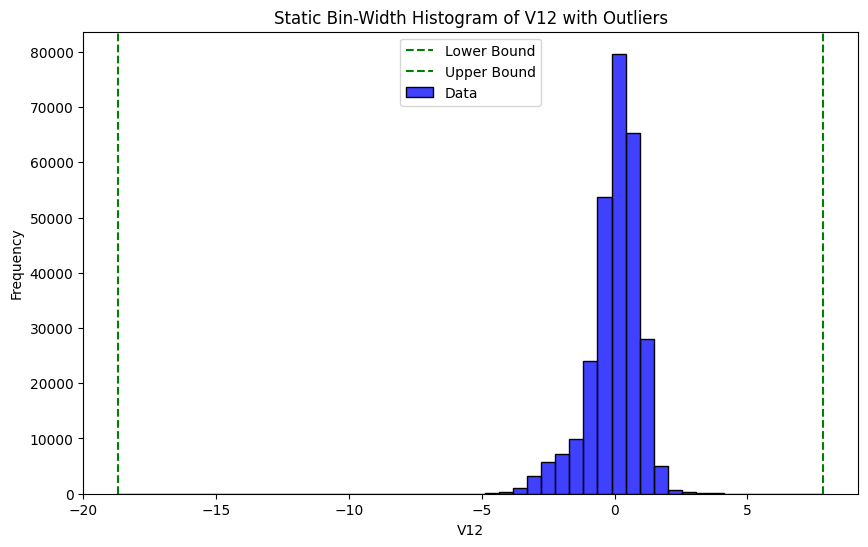

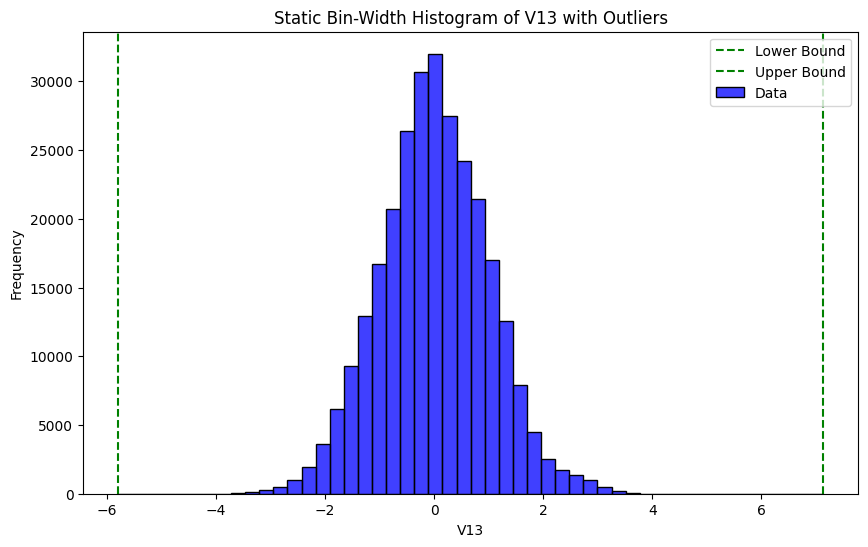

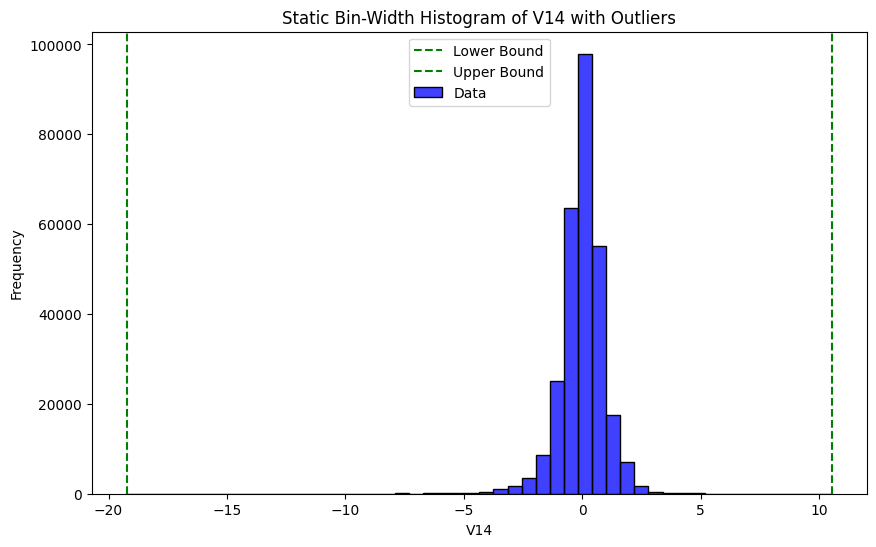

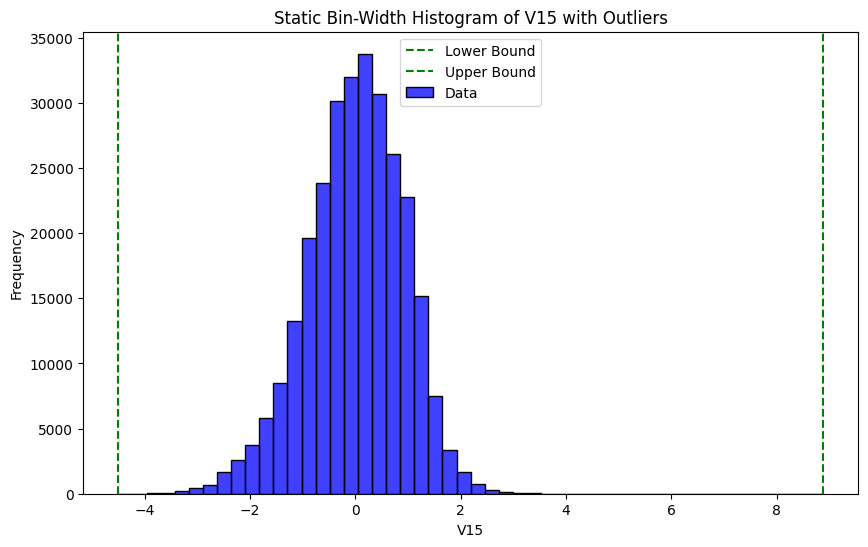

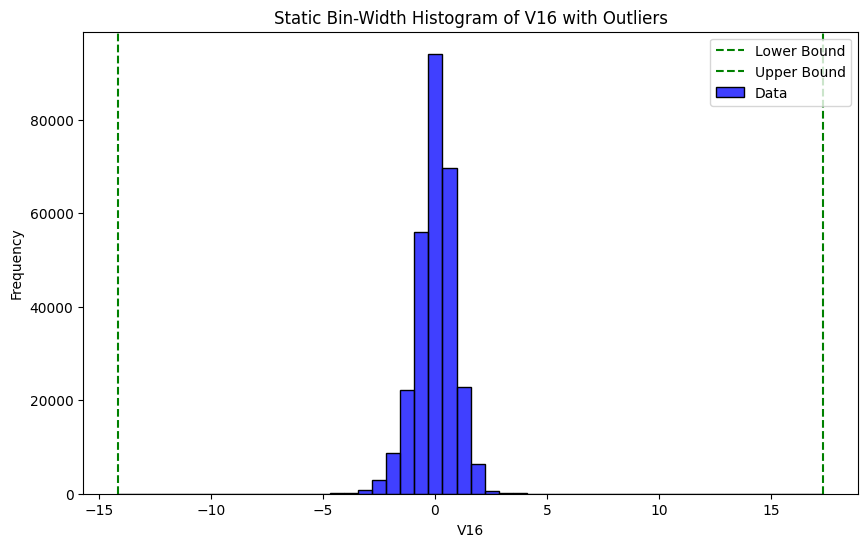

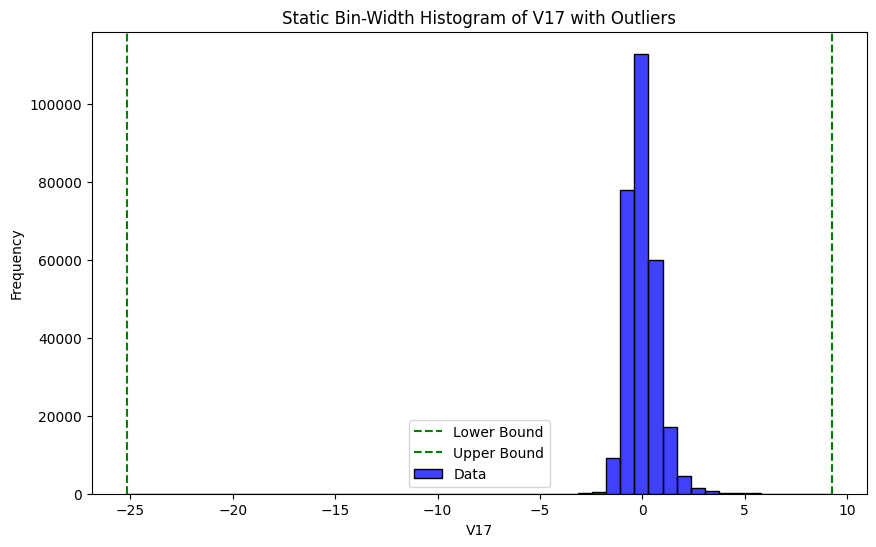

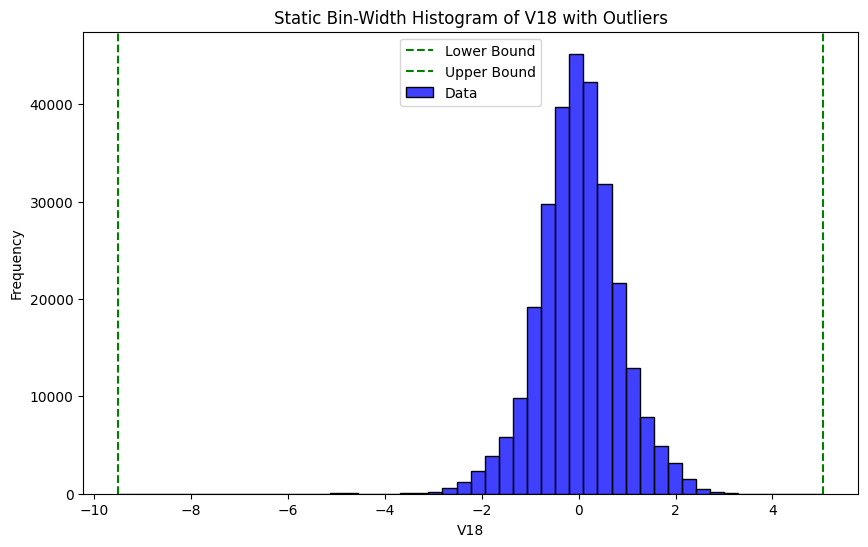

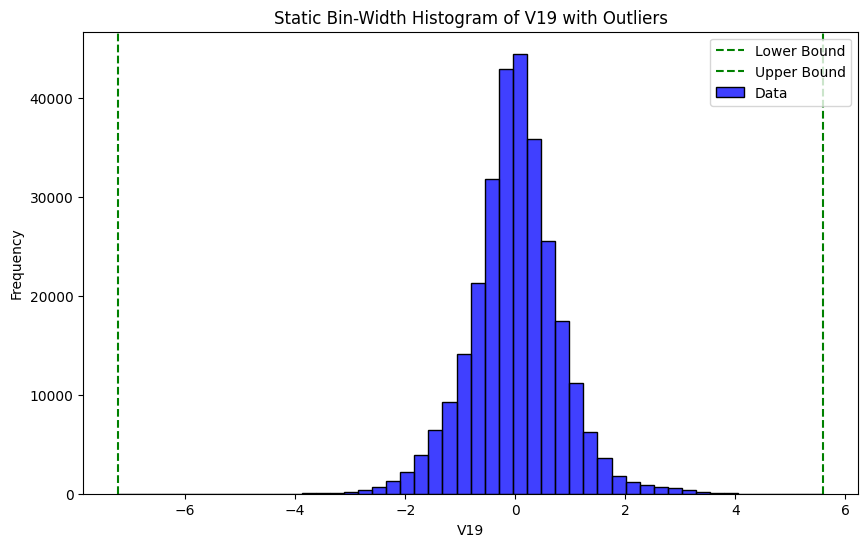

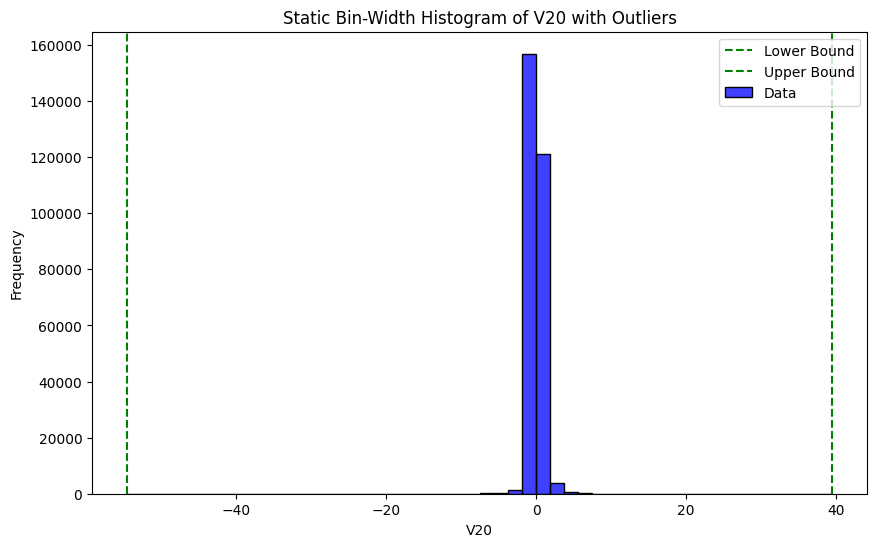

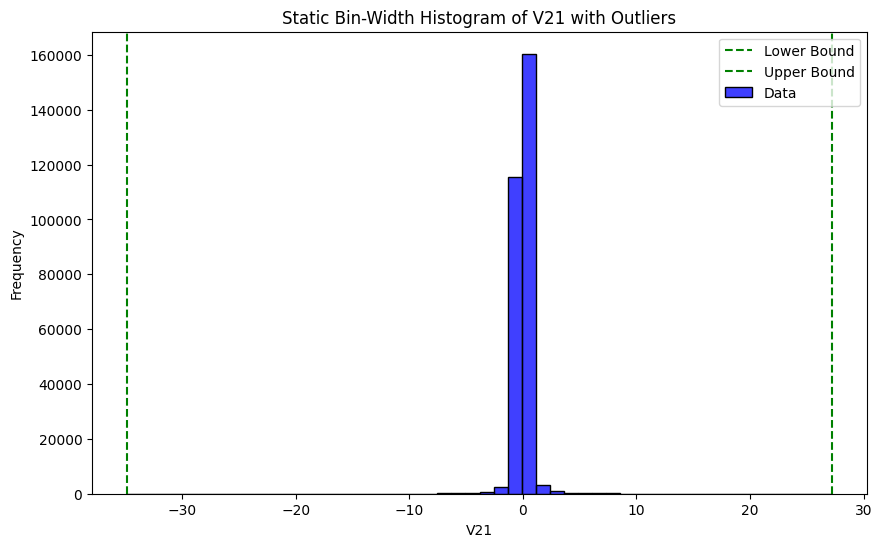

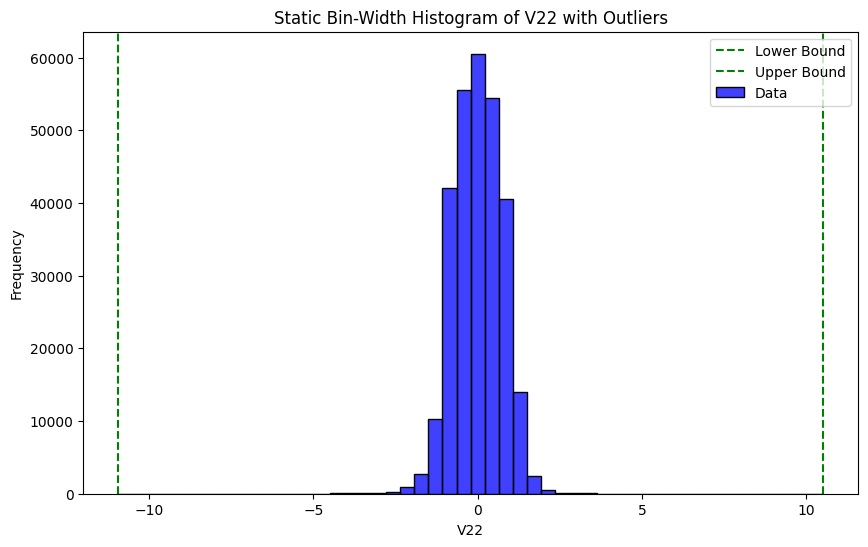

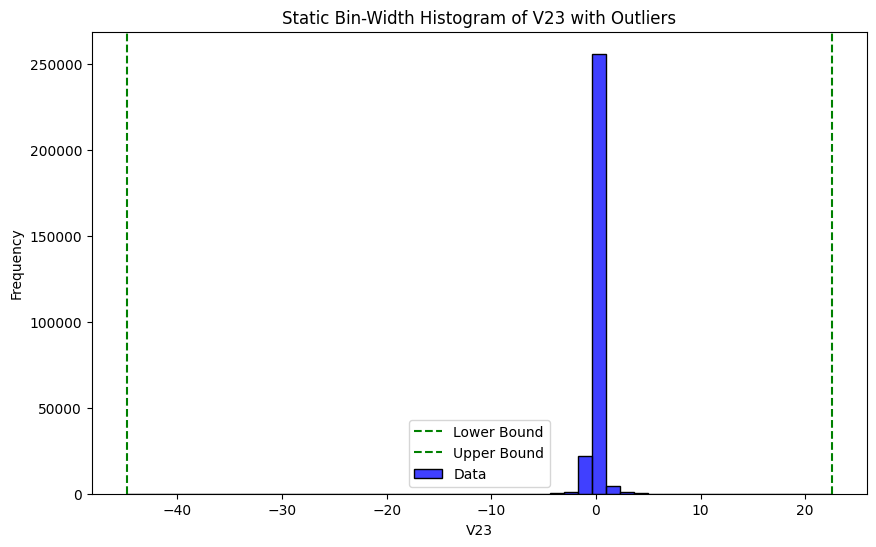

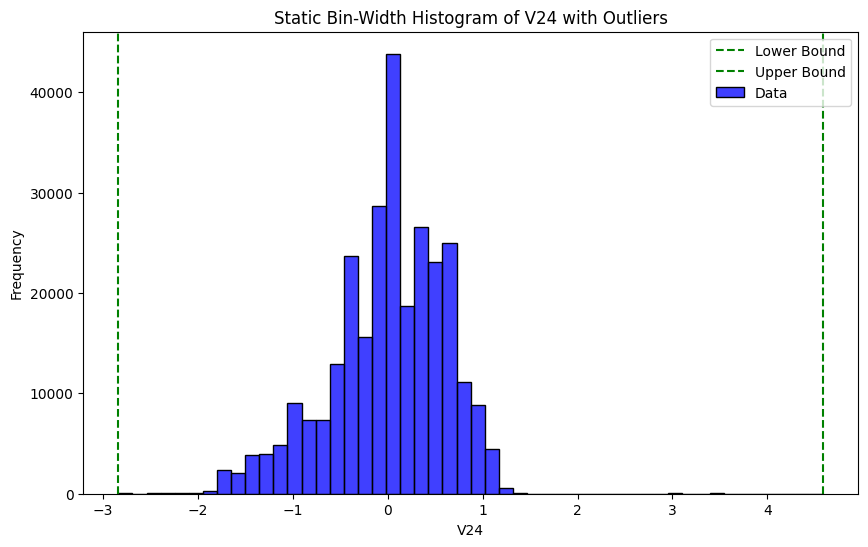

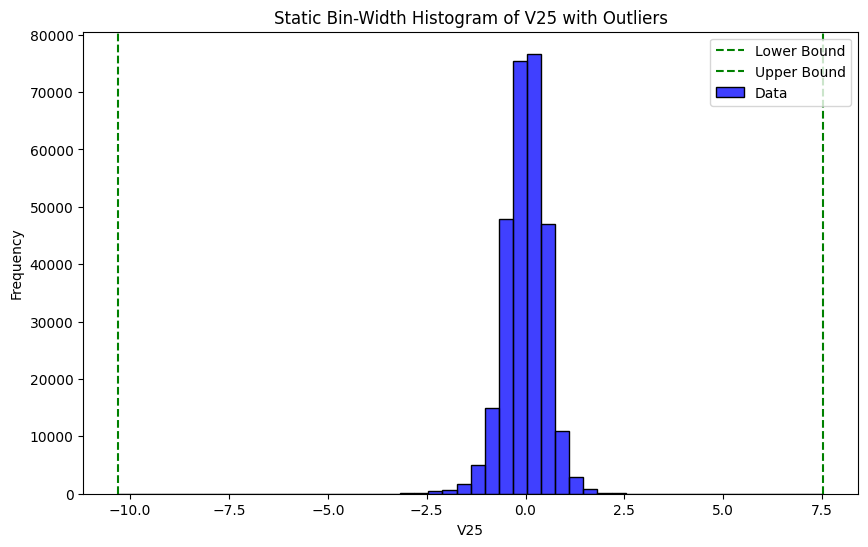

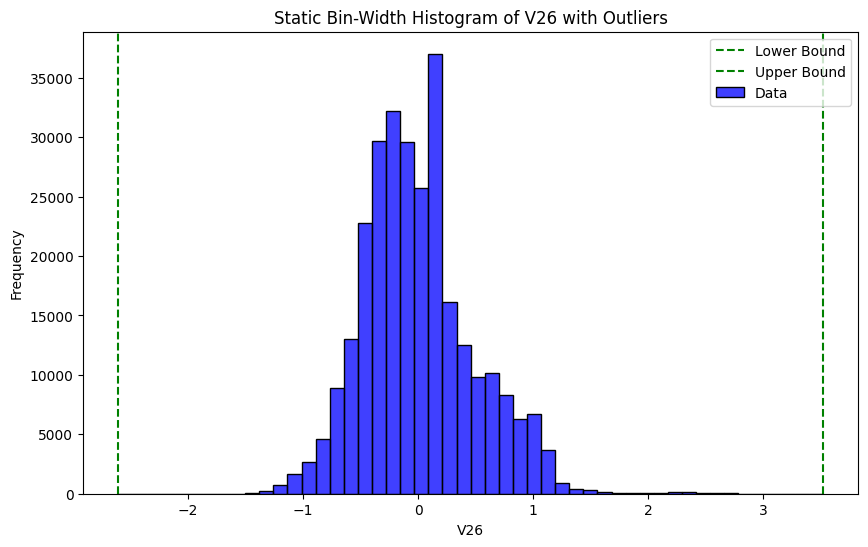

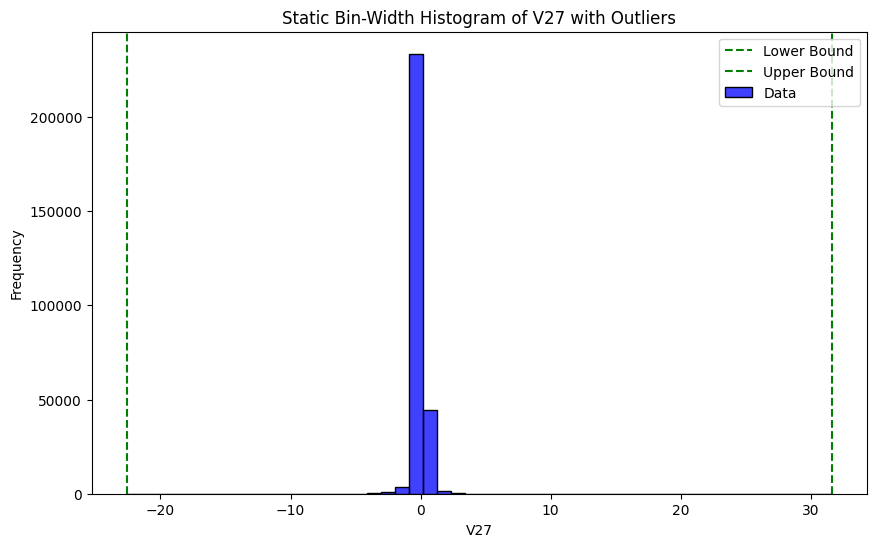

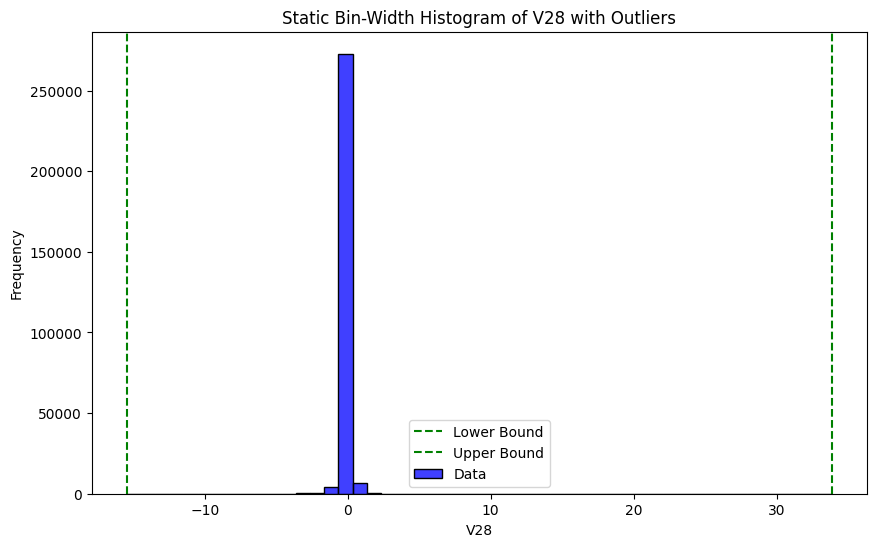

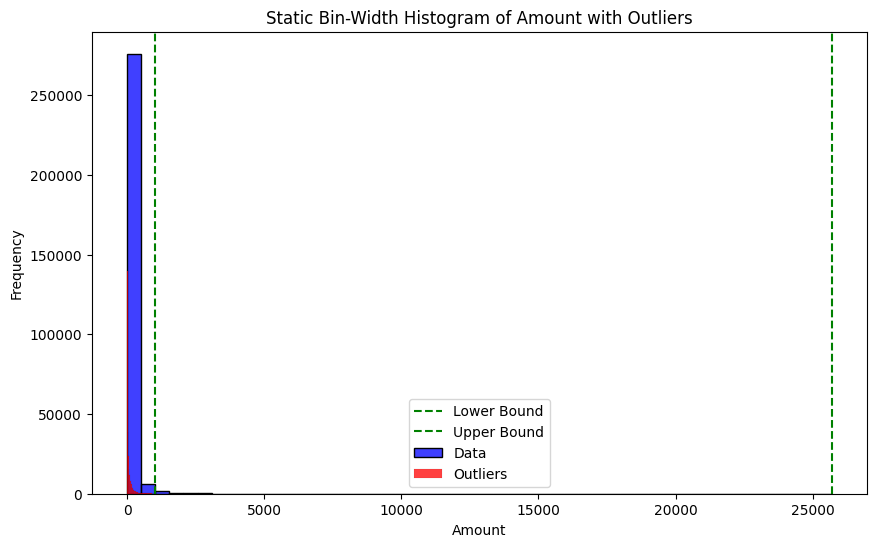

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def static_bin_width_histogram_outliers(df, feature, bins=50, threshold=0.01):
    counts, bin_edges = np.histogram(df[feature], bins=bins)
    total_points = len(df[feature])

    densities = counts / total_points

    low_density_bins = np.where(densities < threshold)[0]

    lower_bound = bin_edges[low_density_bins.min()] if len(low_density_bins) > 0 else np.nan
    upper_bound = bin_edges[low_density_bins.max() + 1] if len(low_density_bins) > 0 else np.nan

    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=bins, kde=False, color='blue', label='Data')

    if not np.isnan(lower_bound):
        sns.histplot(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature], bins=bins, color='red', label='Outliers')
        plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound')
        plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')

    plt.title(f"Static Bin-Width Histogram of {feature} with Outliers")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

for feature in feature_list:
    static_bin_width_histogram_outliers(df, feature, bins=50, threshold=0.01)


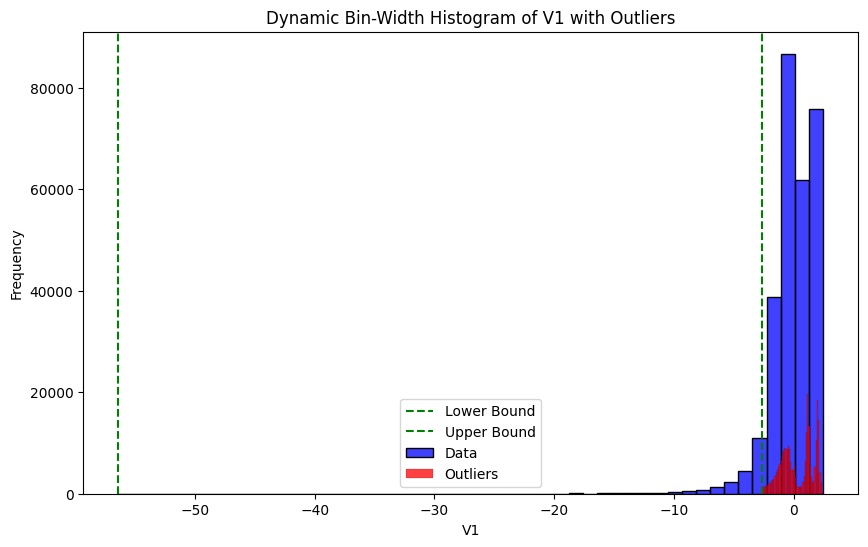

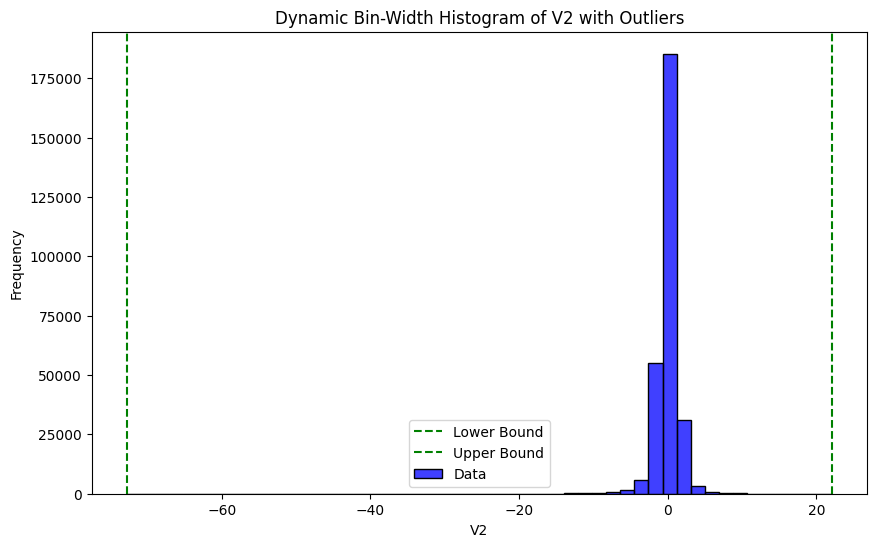

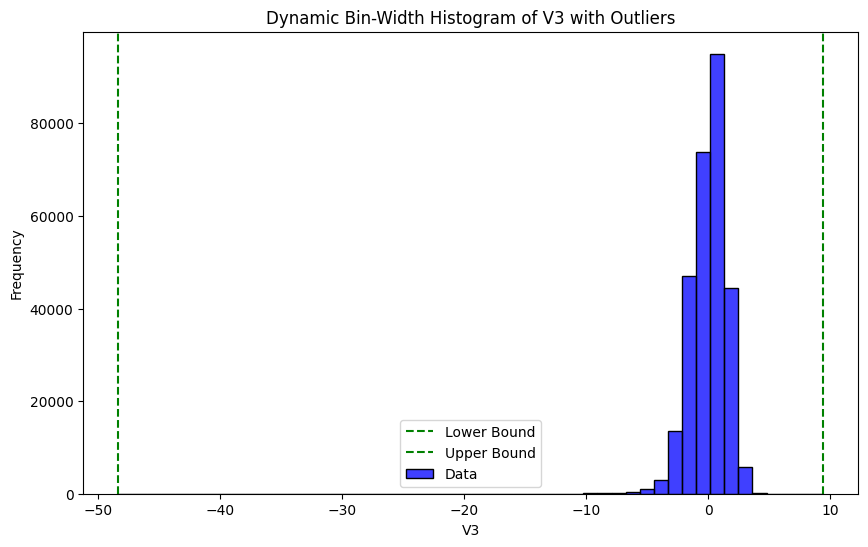

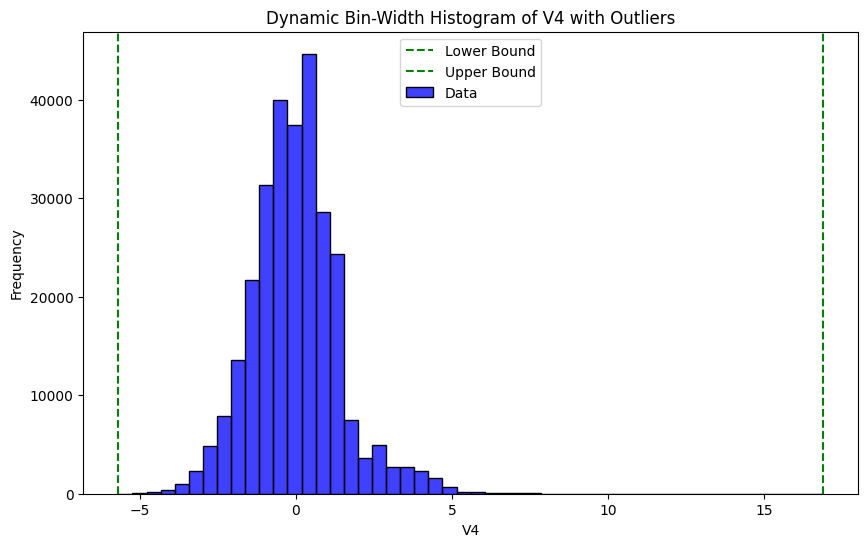

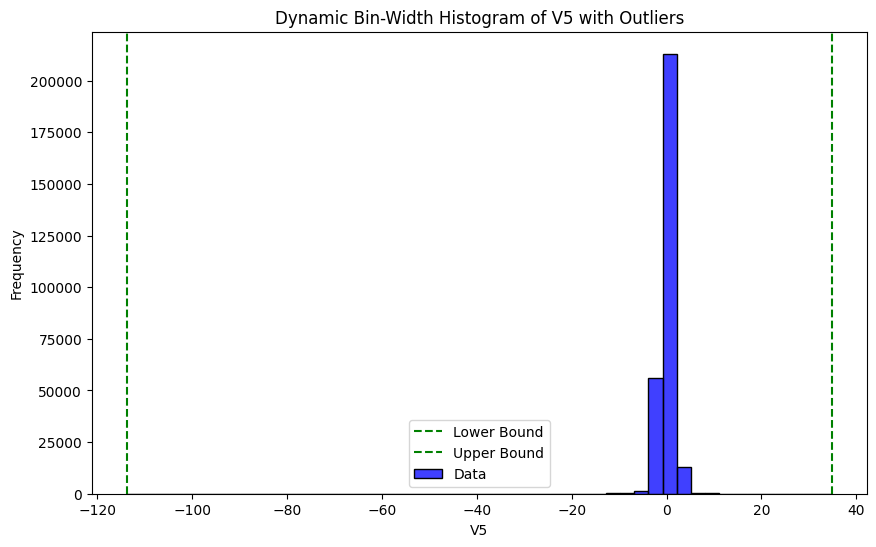

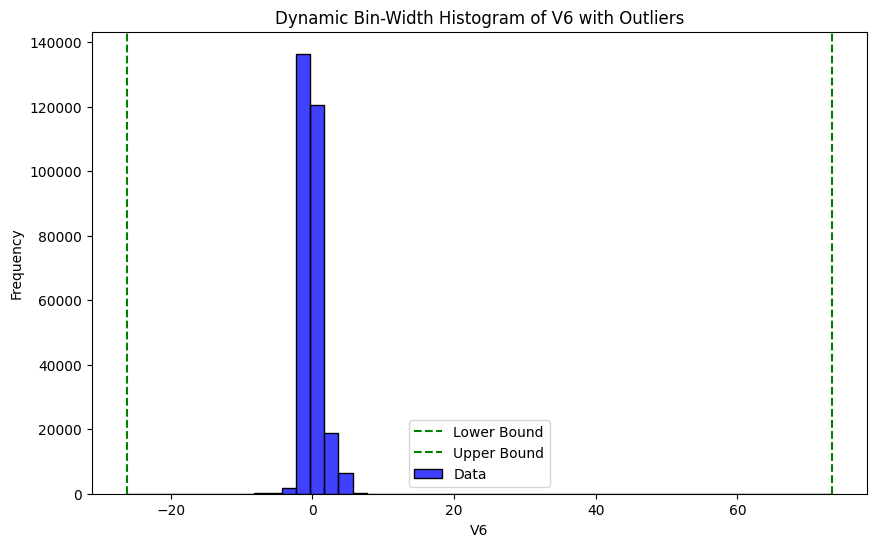

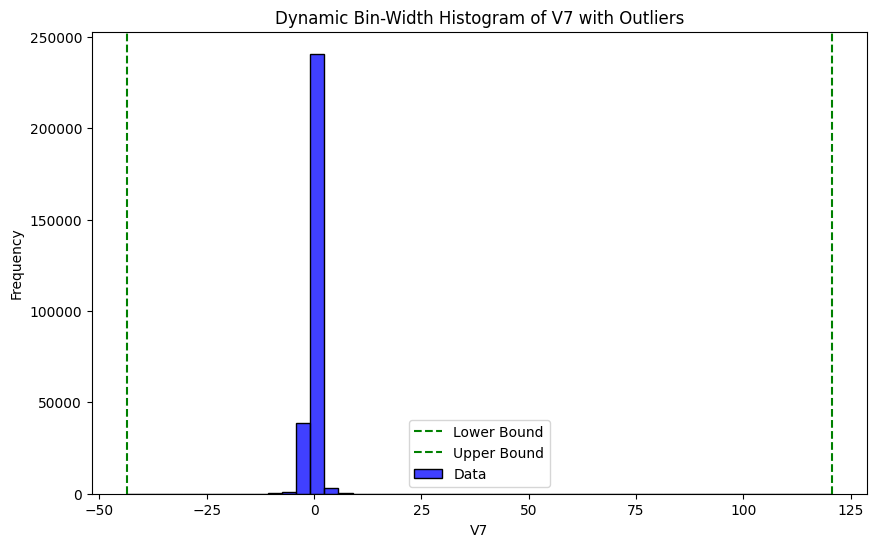

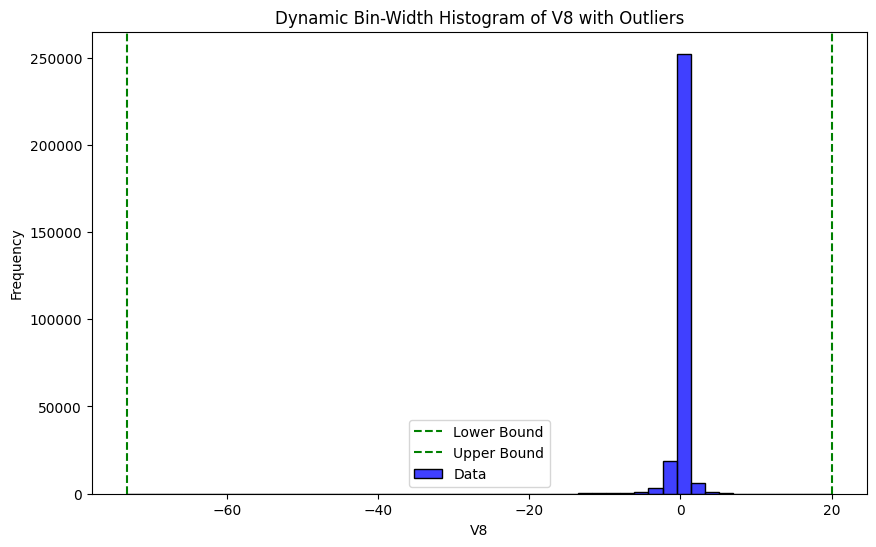

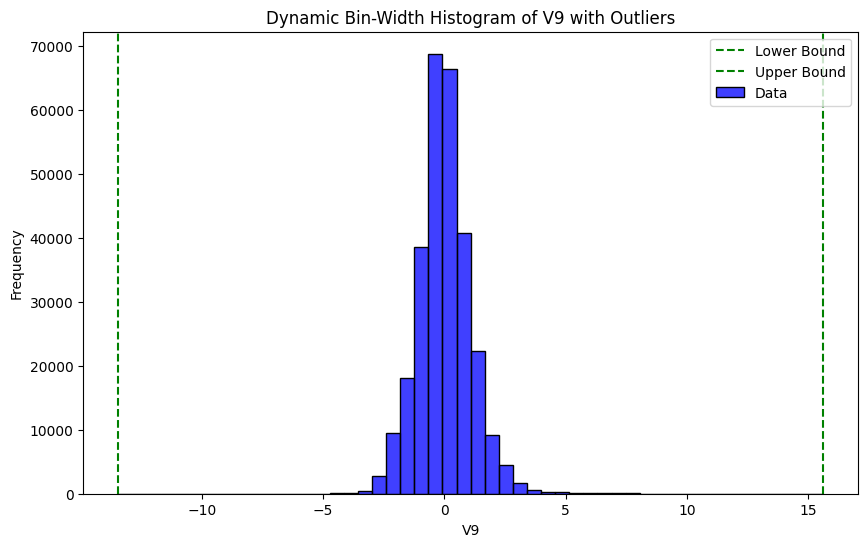

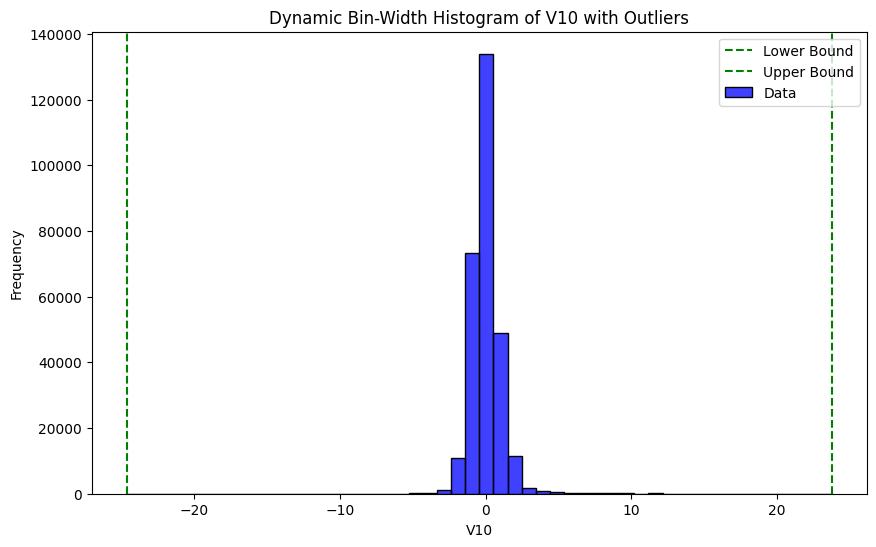

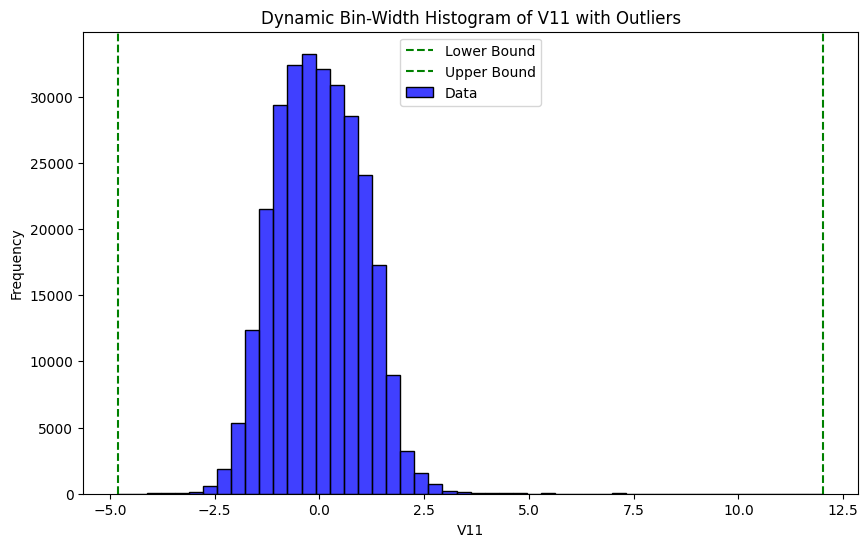

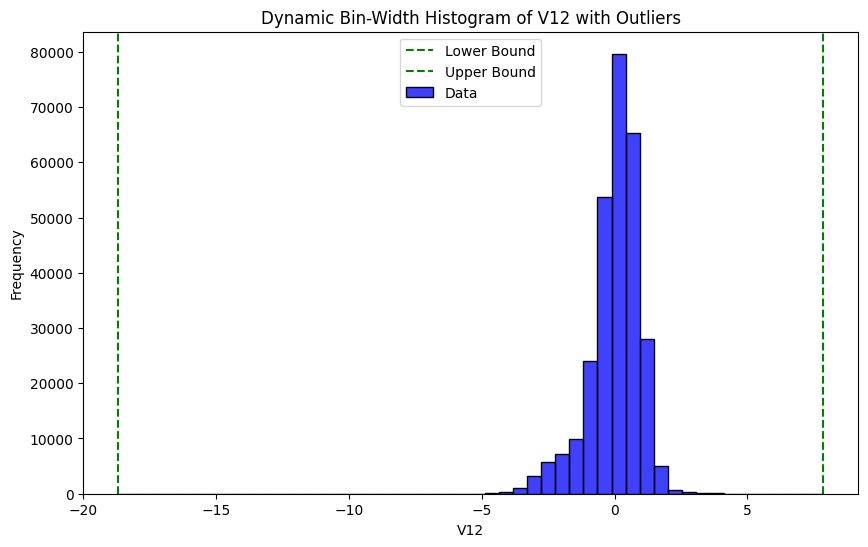

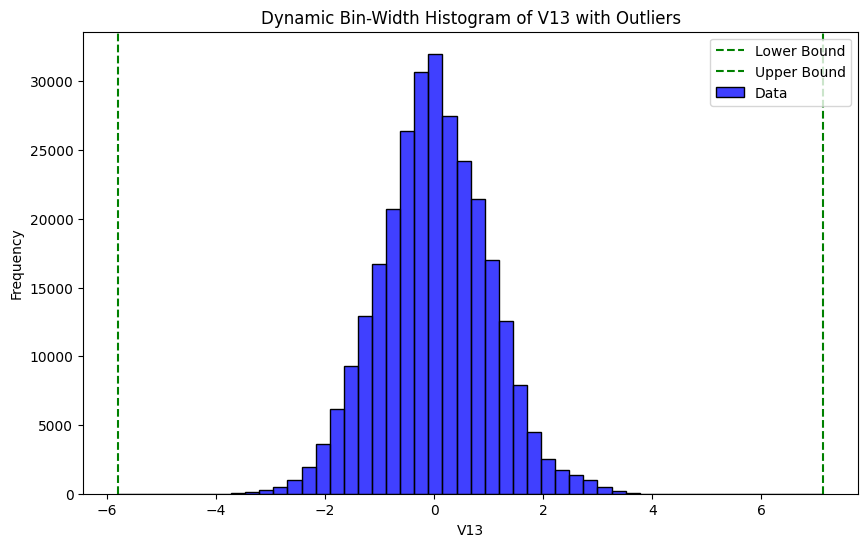

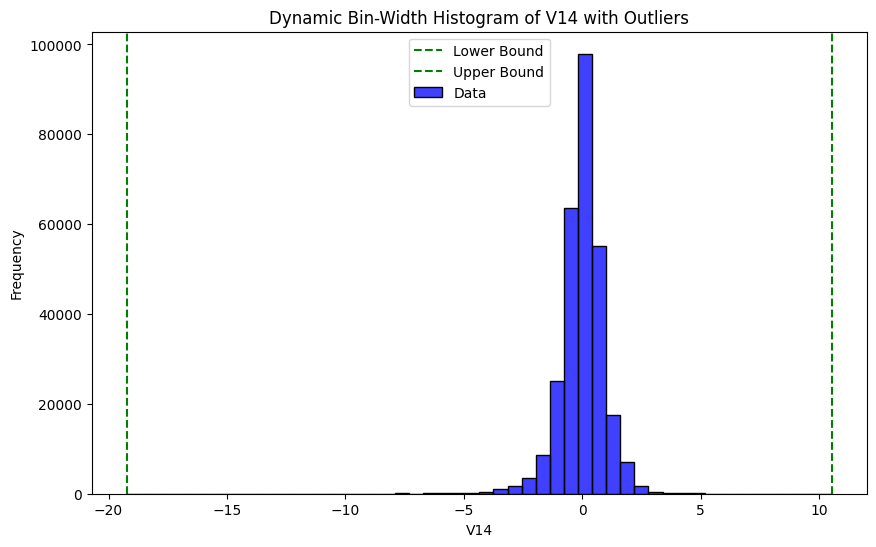

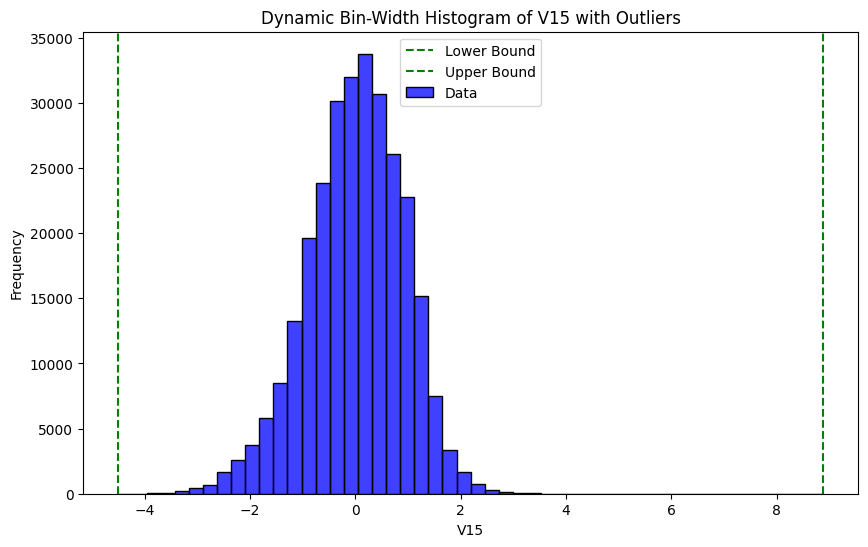

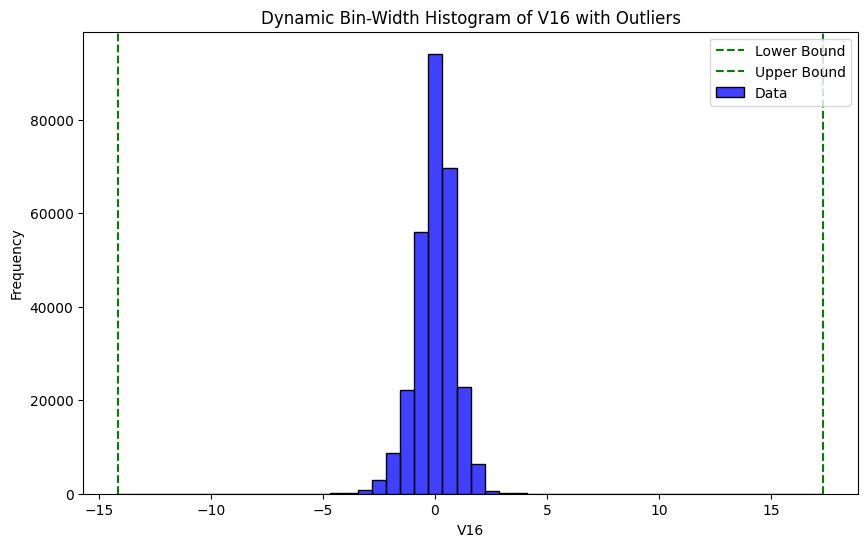

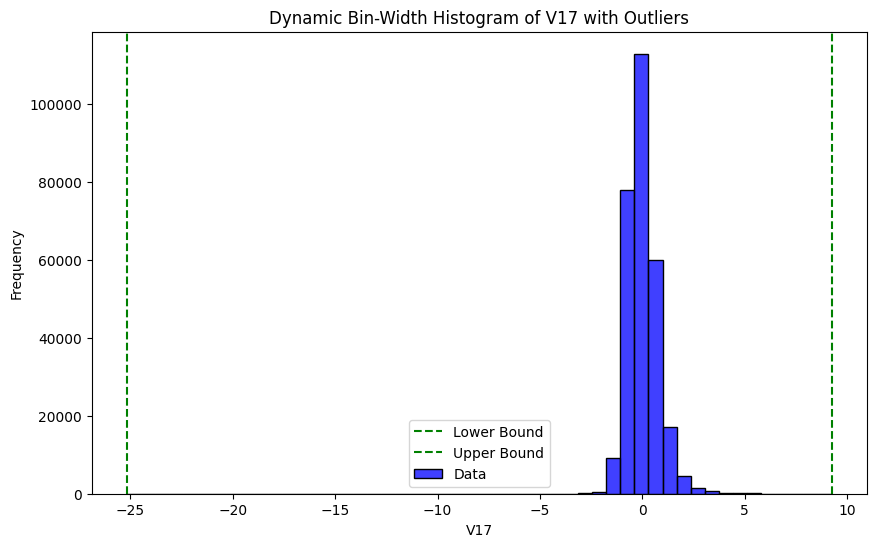

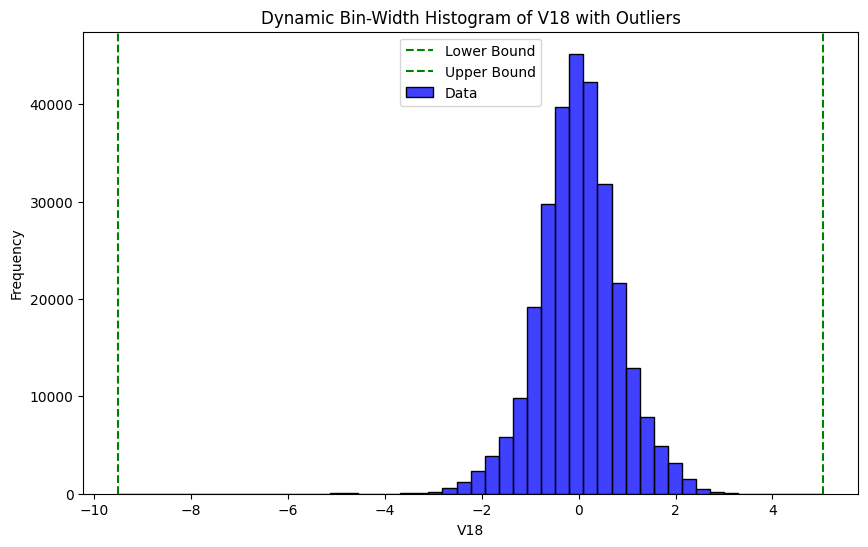

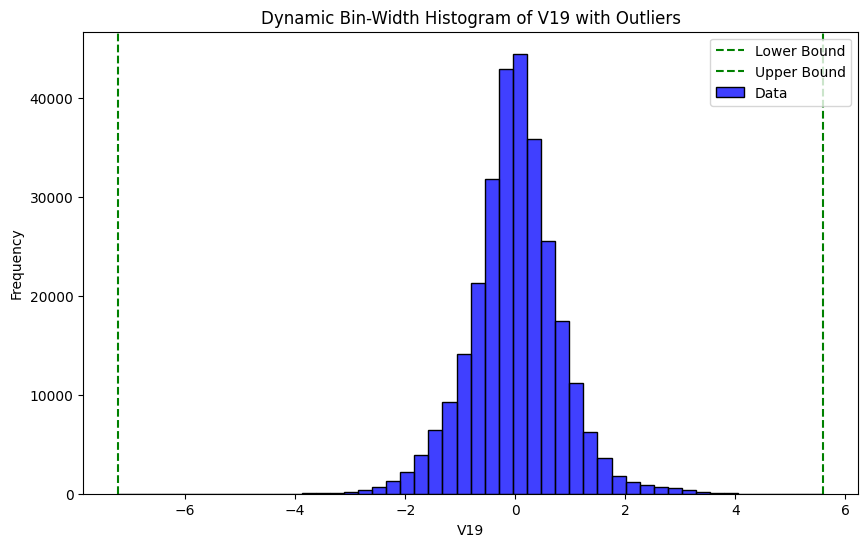

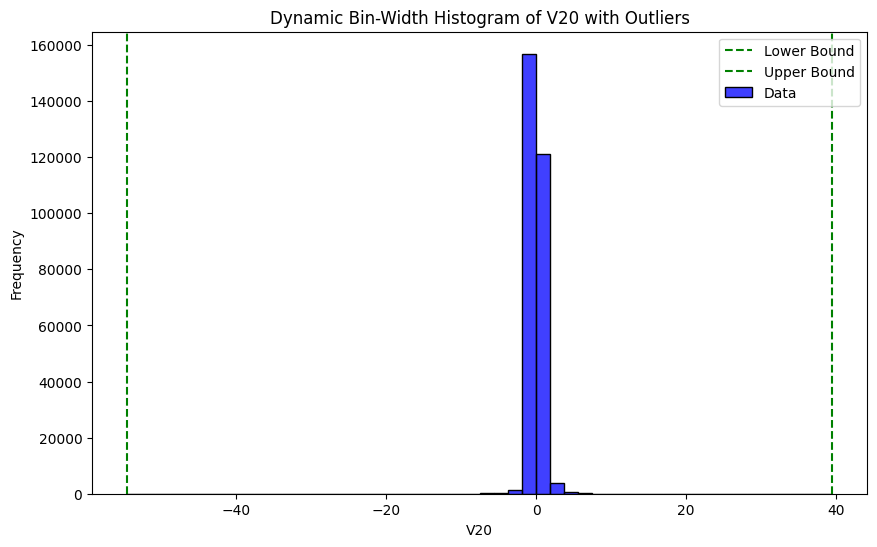

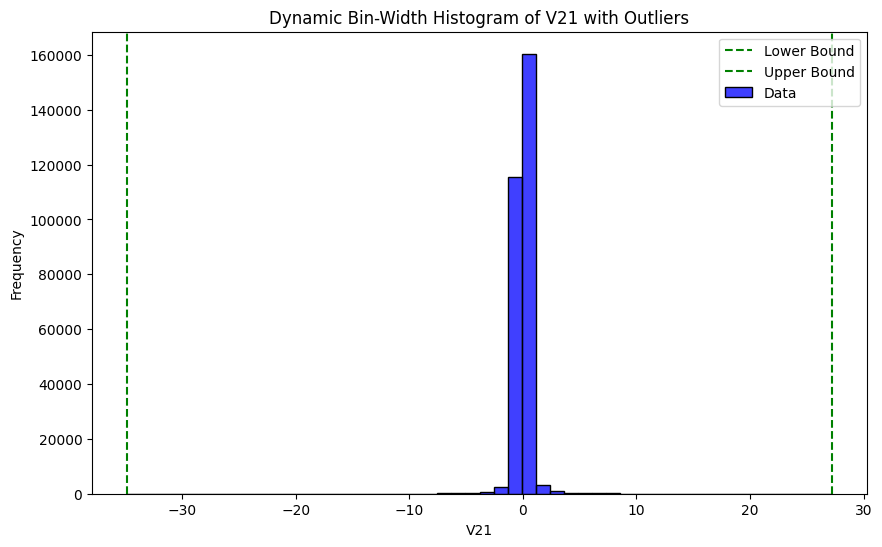

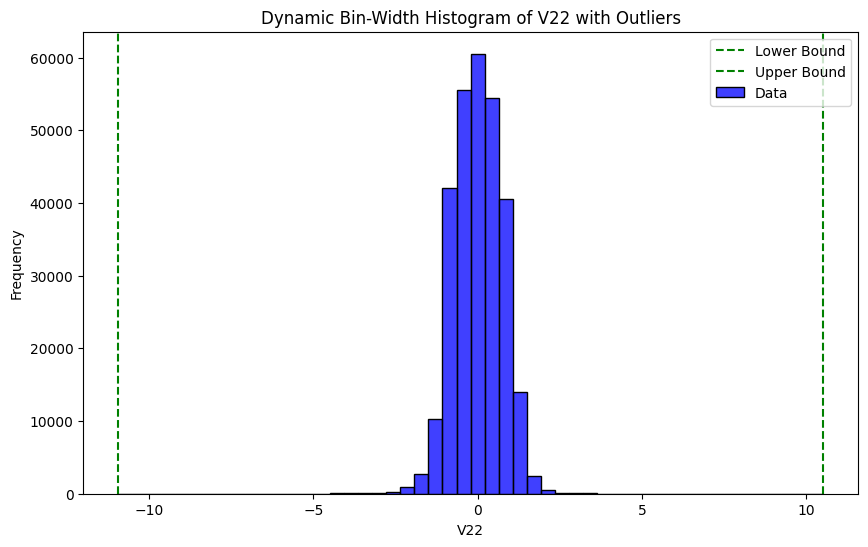

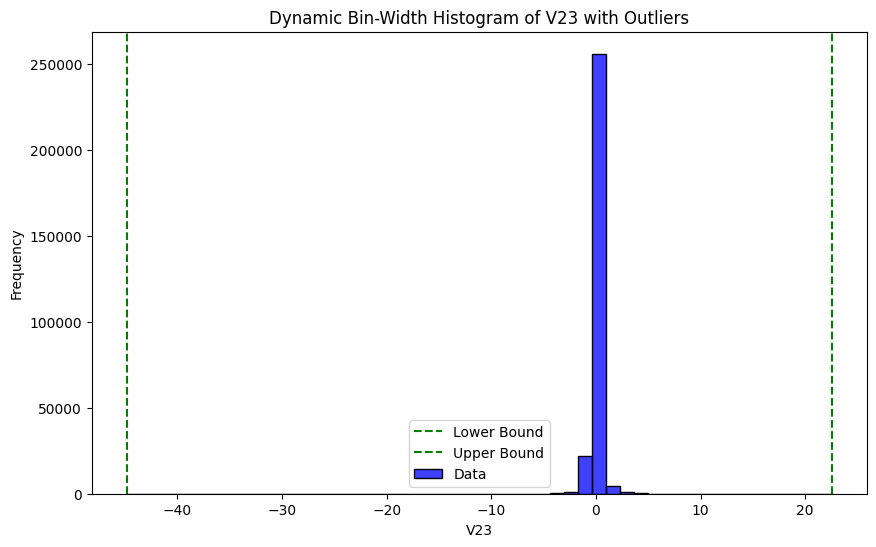

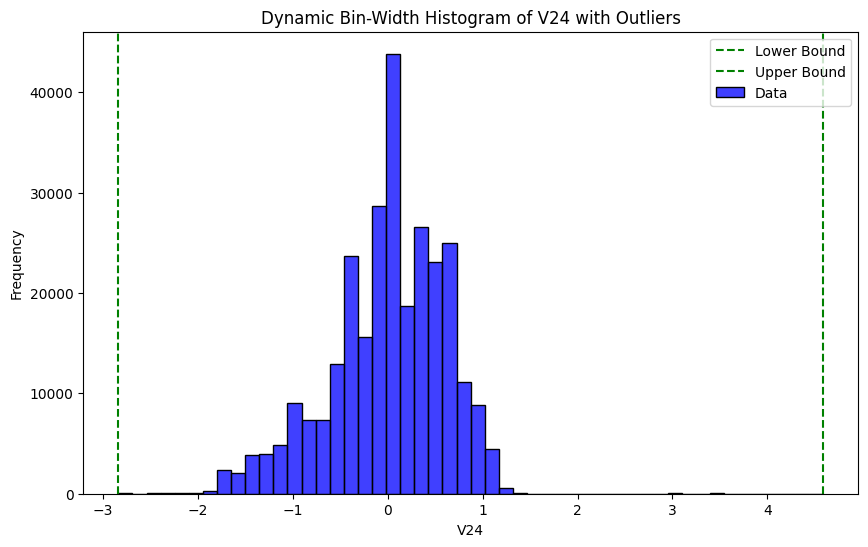

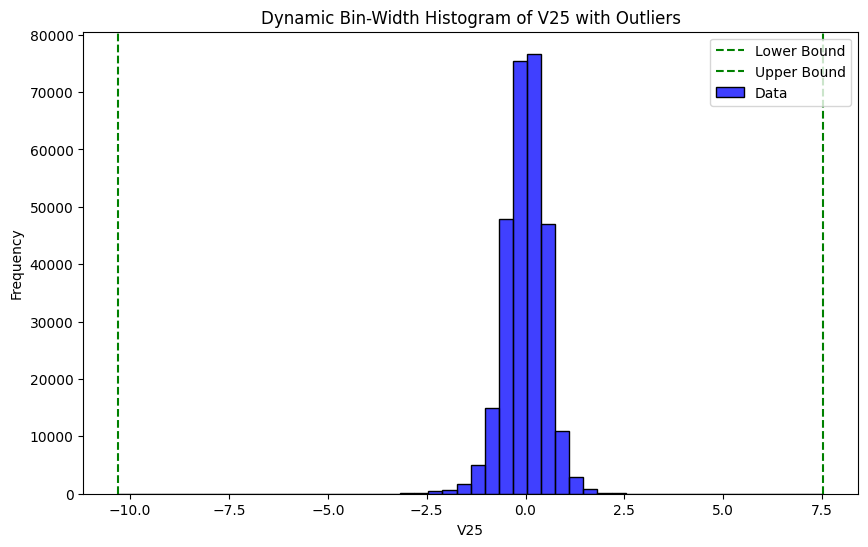

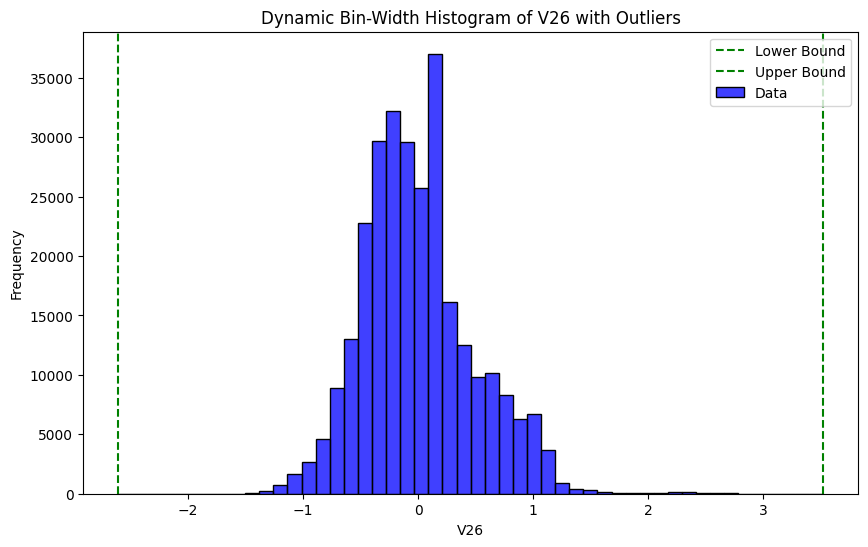

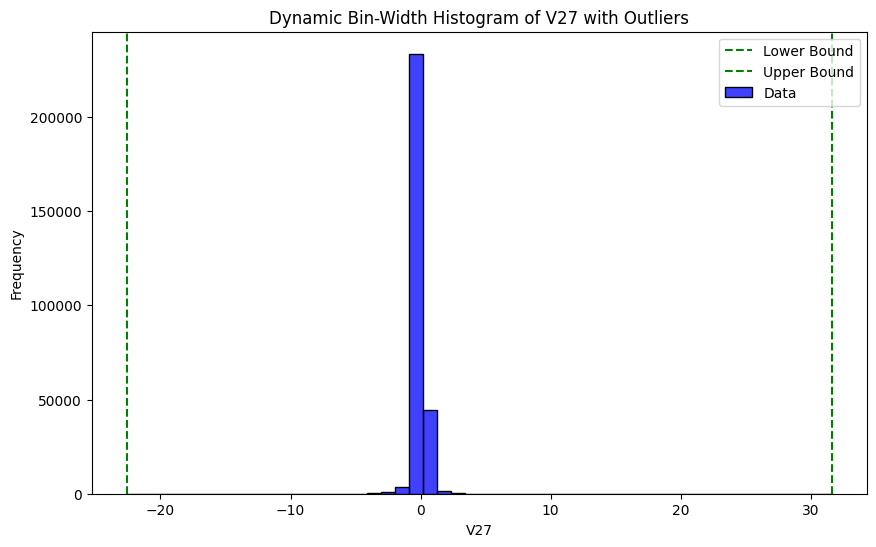

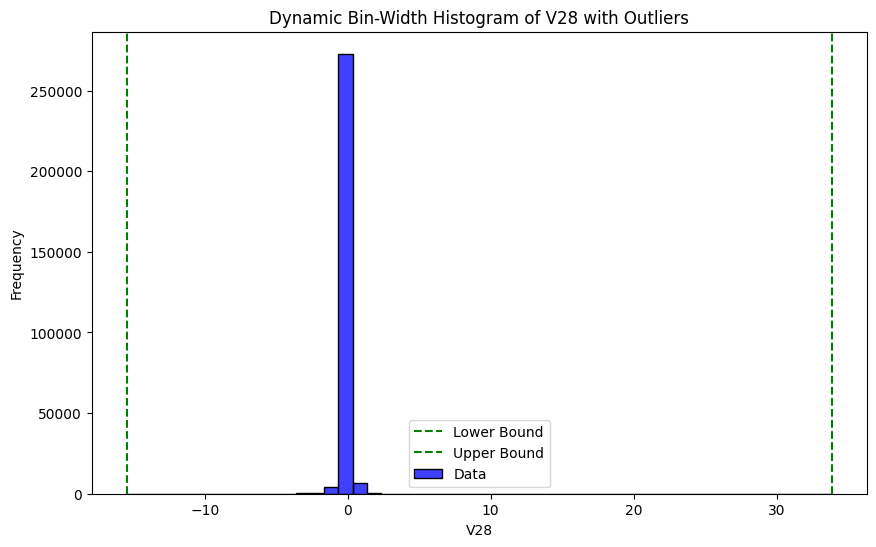

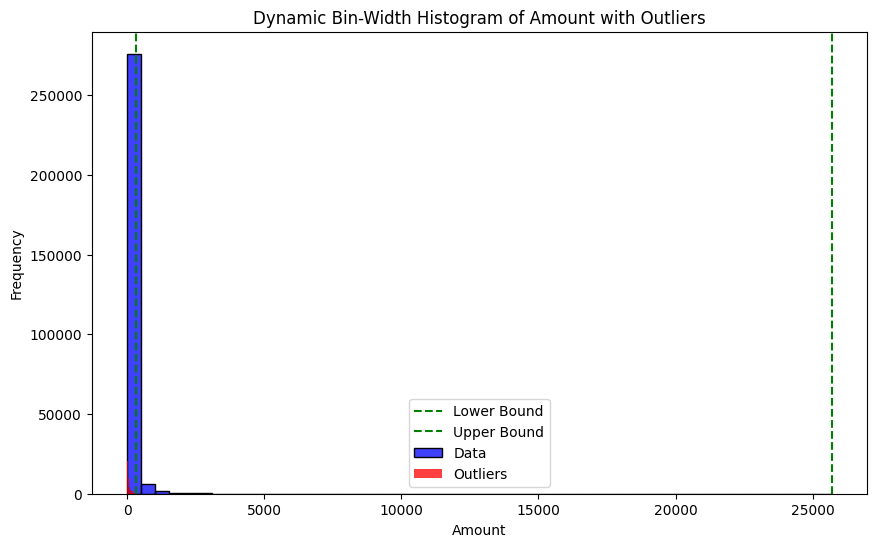

In [ ]:
def dynamic_bin_width_histogram_outliers(df, feature, num_bins=50):
    sorted_values = np.sort(df[feature])
    total_points = len(sorted_values)

    points_per_bin = total_points // num_bins

    bin_edges = []
    densities = []

    for i in range(num_bins):
        bin_start = i * points_per_bin
        bin_end = (i + 1) * points_per_bin if (i + 1) * points_per_bin < total_points else total_points

        bin_edges.append(sorted_values[bin_start])
        densities.append(points_per_bin / (sorted_values[bin_end - 1] - sorted_values[bin_start] + 1e-10))

    bin_edges.append(sorted_values[-1])

    threshold = np.percentile(densities, 5)
    low_density_bins = np.where(np.array(densities) < threshold)[0]

    lower_bound = bin_edges[low_density_bins.min()] if len(low_density_bins) > 0 else np.nan
    upper_bound = bin_edges[low_density_bins.max() + 1] if len(low_density_bins) > 0 else np.nan

    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=num_bins, kde=False, color='blue', label='Data')

    if not np.isnan(lower_bound):
        sns.histplot(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature], bins=num_bins, color='red', label='Outliers')
        plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound')
        plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')

    plt.title(f"Dynamic Bin-Width Histogram of {feature} with Outliers")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

for feature in feature_list:
  dynamic_bin_width_histogram_outliers(df, feature, num_bins=50)

In [ ]:
import numpy as np
import pandas as pd

def calculate_hbos_optimized(df, bins=50):
    hbos_scores = np.zeros(df.shape[0])
    histograms = {}

    for col in df.columns:
        counts, bin_edges = np.histogram(df[col], bins=bins, density=True)
        histograms[col] = (counts, bin_edges)

    for i in range(df.shape[0]):
        score = 0
        for col in df.columns:
            counts, bin_edges = histograms[col]
            bin_index = np.digitize(df[col].iloc[i], bin_edges) - 1

            hist_value = counts[bin_index] if 0 <= bin_index < len(counts) else 0

            if hist_value > 0:
                score += np.log(1 / hist_value)

        hbos_scores[i] = score

    return pd.Series(hbos_scores)

hbos_scores = calculate_hbos_optimized(df[feature_list], bins=50)
df['HBOS_Score'] = hbos_scores

print(df[['HBOS_Score']])


        HBOS_Score
0        35.919701
1        32.023499
2        51.197576
3        40.114961
4        39.102021
...            ...
284802  114.744843
284803   38.942578
284804   39.112316
284805   44.319136
284806   32.481398

[284807 rows x 1 columns]


### **Non Parametric - Kernel Based Method**


In [ ]:
def kde_sklearn(X, bandwidth):
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(X)
    log_density = kde.score_samples(X)
    return np.exp(log_density)

def detect_outliers_kde(df, features, bandwidth, threshold=0.01):
    X = df[features].values
    densities = kde_sklearn(X, bandwidth)
    outlier_mask = densities < np.quantile(densities, threshold)
    return pd.Series(outlier_mask, index=df.index), densities

bandwidth = 1.0
outliers, densities = detect_outliers_kde(df, feature_list, bandwidth)

df['Density'] = densities
df['Is_Outlier'] = outliers

print(df[['Density', 'Is_Outlier']])

plt.figure(figsize=(10, 6))
sns.histplot(df['Density'], bins=50, kde=True)
plt.title('Density Estimation using Gaussian KDE')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.show()


## **Distance-based Detection Method**

Solving set approach

ABOD approach

LDOF algorithm

In [ ]:
def knn_density(X, k):
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(X)
    distances, _ = knn.kneighbors(X)
    densities = 1 / (np.mean(distances, axis=1) + 1e-5)

    return densities

def solving_set_outliers(df, features, k, threshold=0.01):
    X = df[features].values
    densities = knn_density(X, k)
    outlier_mask = densities < np.quantile(densities, threshold)
    return pd.Series(outlier_mask, index=df.index), densities

outliers, densities = solving_set_outliers(df, feature_list, k)

df['Density'] = densities
df['Is_Outlier'] = outliers

print(df[['Density', 'Is_Outlier']])

plt.figure(figsize=(10, 6))
sns.histplot(df['Density'], bins=50, kde=True)
plt.title('Density Estimation using Solving Set Approach')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[feature_list[0]], y=df[feature_list[1]], hue=df['Is_Outlier'])
plt.title('Outliers based on Solving Set Approach')
plt.show()

In [ ]:
def abod(data, k=5):
    n_samples = data.shape[0]
    abod_scores = np.zeros(n_samples)

    nbrs = NearestNeighbors(n_neighbors=k + 1).fit(data)
    distances, indices = nbrs.kneighbors(data)
    for i in range(n_samples):
        neighbors = data[indices[i, 1:]]
        angles = []

        for j in range(len(neighbors)):
            for l in range(j + 1, len(neighbors)):
                vec1 = neighbors[j] - data[i]
                vec2 = neighbors[l] - data[i]
                cos_theta = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
                cos_theta = np.clip(cos_theta, -1.0, 1.0)
                angle = np.arccos(cos_theta)
                angles.append(angle)

        abod_scores[i] = np.var(angles) if angles else 0.0

    return abod_scores

data = df[feature_list].values
abod_scores = abod(data, k=5)

df['ABOD_Score'] = abod_scores
print(df[['ABOD_Score']])

<ipython-input-11-9656d2b6ec7c>:15: RuntimeWarning: invalid value encountered in scalar divide
  cos_theta = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))


        ABOD_Score
0         0.083501
1         1.094559
2         0.051251
3         0.040695
4         0.025398
...            ...
284802    0.230973
284803    0.039772
284804    1.163226
284805    0.061273
284806    0.112337

[284807 rows x 1 columns]
